In [6]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import networkx as nx
sns.set_style("whitegrid")

In [7]:
p1 = pd.read_csv('plot_data/p1_long.csv')
p1.head()

Num  LCC        GE  Score      Measure         Strategy
0    0  401  0.101256    NaN   Closeness   Non-sequential 
1    0  401  0.101256    NaN  Betweenness  Non-sequential 
2    0  401  0.101256    NaN  Eigenvector  Non-sequential 
3    0  401  0.101256    NaN   Closeness       Sequential 
4    0  401  0.101256    NaN  Betweenness      Sequential

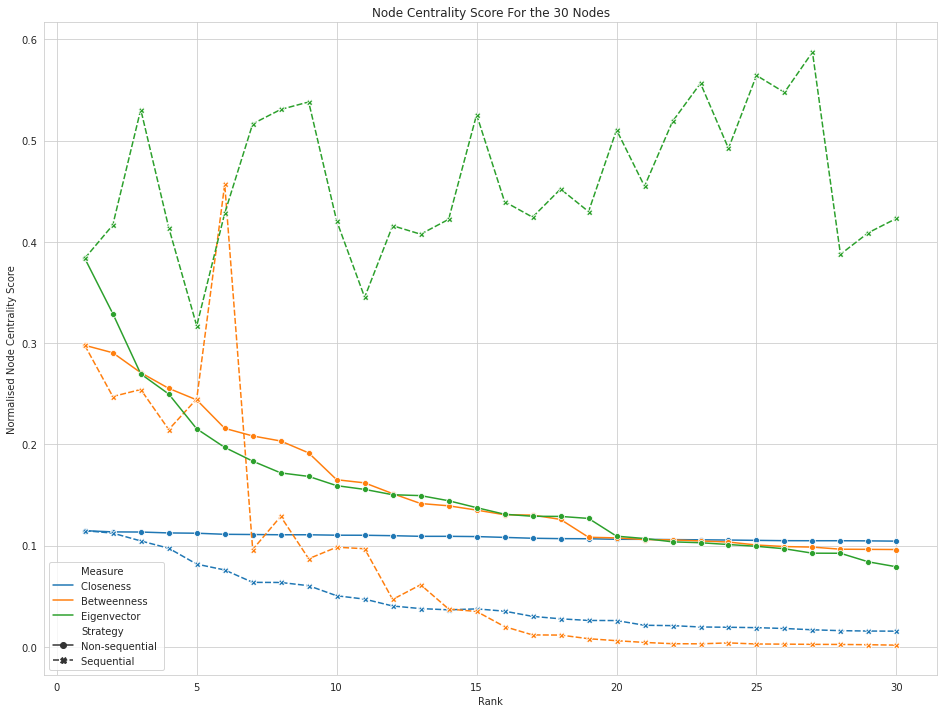

In [8]:
# Plot a line plot 
plt.figure(figsize=(16,12))
sns.lineplot(data=p1, x="Num", y="Score", hue="Measure", style="Strategy", markers=True)

# Giving title to the chart using plt.title
plt.title('Node Centrality Score For the 30 Nodes')
 
# Providing x, y and legend label to the chart
plt.xlabel('Rank')
plt.ylabel('Normalised Node Centrality Score')

plt.legend(loc ="lower left")
#save fig
plt.savefig("export/sc.png")

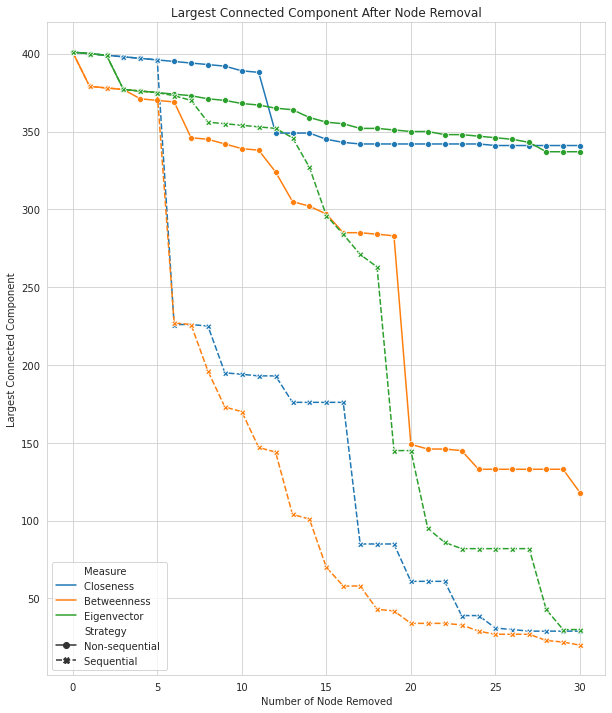

In [9]:
# Plot a line plot 
plt.figure(figsize=(10,12))
sns.lineplot(data=p1, x="Num", y="LCC", hue="Measure", style="Strategy", markers=True)

# Giving title to the chart using plt.title
plt.title('Largest Connected Component After Node Removal')
 
# Providing x, y and legend label to the chart
plt.xlabel('Number of Node Removed')
plt.ylabel('Largest Connected Component')

plt.legend(loc ="lower left")
#save fig
plt.savefig("export/p1_lcc.png")

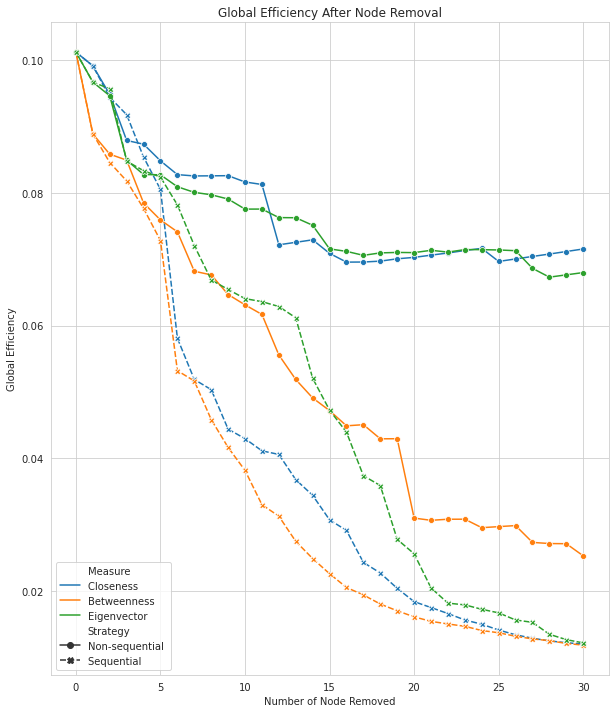

In [10]:
# Plot a line plot 
plt.figure(figsize=(10,12))
sns.lineplot(data=p1, x="Num", y="GE", hue="Measure", style="Strategy", markers=True)

# Giving title to the chart using plt.title
plt.title('Global Efficiency After Node Removal')
 
# Providing x, y and legend label to the chart
plt.xlabel('Number of Node Removed')
plt.ylabel('Global Efficiency')

plt.legend(loc ="lower left")
#save fig
plt.savefig("export/p1_ge.png")

In [13]:
p1_w = pd.read_csv('plot_data/p1_long_weight.csv')
p1_w

Num       cnt                    Measure     Score  \
0     0  0.129120         Global Efficiency        NaN   
1     0  0.129120         Global Efficiency        NaN   
2     0  0.037765  Average Local Efficiency        NaN   
3     0  0.037765  Average Local Efficiency        NaN   
4     1  0.116822         Global Efficiency   0.613158   
5     2  0.113669         Global Efficiency   0.582362   
6     3  0.109285         Global Efficiency   0.414295   
7     1  0.116822         Global Efficiency   0.613158   
8     2  0.105066         Global Efficiency   0.430813   
9     3  0.098788         Global Efficiency   0.418604   
10    1  0.036572  Average Local Efficiency        NaN   
11    2  0.034355  Average Local Efficiency        NaN   
12    3  0.032321  Average Local Efficiency        NaN   
13    1  0.036572  Average Local Efficiency        NaN   
14    2  0.036831  Average Local Efficiency        NaN   
15    3  0.035269  Average Local Efficiency        NaN   

                     Station         Strategy  
0                        NaN  Non-sequential   
1                        NaN      Sequential   
2                        NaN  Non-sequential   
3                        NaN      Sequential   
4          Bank and Monument  Non-sequential   
5                   Waterloo  Non-sequential   
6                 Green Park  Non-sequential   
7          Bank and Monument      Sequential   
8   King's Cross St. Pancras      Sequential   
9                 Green Park      Sequential   
10         Bank and Monument  Non-sequential   
11                  Waterloo  Non-sequential   
12                Green Park  Non-sequential   
13         Bank and Monument      Sequential   
14  King's Cross St. Pancras      Sequential   
15                Green Park      Sequential

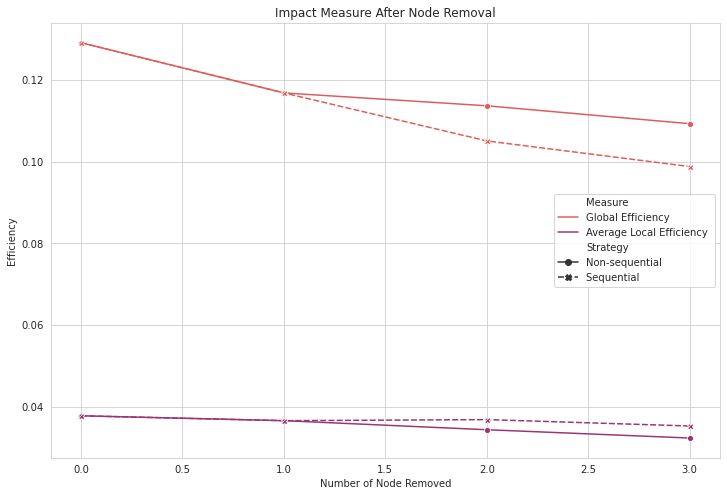

In [14]:
# Plot a line plot 
plt.figure(figsize=(12,8))
sns.lineplot(data=p1_w, x="Num", y="cnt", hue="Measure", style="Strategy", markers=True, palette="flare")
# Giving title to the chart using plt.title
plt.title('Impact Measure After Node Removal')
 
# Providing x, y and legend label to the chart
plt.xlabel('Number of Node Removed')
plt.ylabel('Efficiency')

plt.legend(loc ="center right")
#save fig
plt.savefig("export/p1_w_e.png")

In [15]:
p2 = pd.read_csv('export/total_st.csv')
p2

station_destination  prodsimest1  prodsimest4  prodsimest5  prodsimest6  \
0            Abbey Road        445.0        470.0       1280.0       2741.0   
1         Acton Central        391.0        393.0        357.0        346.0   
2            Acton Town       2156.0       2182.0       2442.0       3131.0   
3               Aldgate       8753.0       8836.0       8319.0       6342.0   
4          Aldgate East       9308.0       9398.0       8737.0       6801.0   
..                  ...          ...          ...          ...          ...   
393         Wood Street        341.0        342.0        855.0       2247.0   
394            Woodford        654.0        666.0        732.0       1462.0   
395     Woodgrange Park        156.0        156.0        260.0        467.0   
396       Woodside Park        603.0        609.0        818.0       2253.0   
397    Woolwich Arsenal       1009.0       1081.0        611.0        322.0   

         distance   population    jobs  Dj1_jobsScenario  avg_commute_dist  \
0     5245.291444  5968.656250   345.0             345.0          3.280492   
1    14356.959140  4376.639344   750.0             750.0         13.275014   
2    16452.996435  5448.637931  2202.0            2202.0         13.693622   
3    14019.658576  5162.563559  7782.0            7782.0          8.462552   
4    13347.539042  5098.519841  7932.0            7932.0          8.485384   
..            ...          ...     ...               ...               ...   
393  12344.337419  4907.891892   404.0             404.0          7.501473   
394  21942.611233  5825.295000   706.0             706.0         16.439239   
395  16783.415105  2467.250000   242.0             242.0          9.497594   
396  19797.703602  6744.151515   745.0             745.0         16.992260   
397   9891.671551  4653.675000  4428.0            4428.0          8.887780   

     avg_commute_dist_5  avg_commute_dist_6  total_commute_dist  \
0              1.548708            1.055697         1459.819125   
1              7.355827            4.019401         5190.530657   
2              7.607927            3.770020        29523.447967   
3              6.669340            4.256862        74072.715608   
4              6.917460            4.478821        78981.958464   
..                  ...                 ...                 ...   
393            3.038372            1.937630         2558.002453   
394            7.565348            3.202704        10751.262361   
395            3.828609            2.218868         1481.624593   
396            5.892609            2.084830        10246.332798   
397            6.942413            4.961329         8967.770297   

     total_commute_dist_5  total_commute_dist_6  per_diff_a  per_diff_b1  \
0             1982.346839           2893.666313    5.617978   187.640449   
1             2626.030346           1390.712660    0.511509    -8.695652   
2            18578.558128          11803.933661    1.205937    13.265306   
3            55482.238649          26997.018781    0.948246    -4.958300   
4            60437.846852          30460.463194    0.966910    -6.134508   
..                    ...                   ...         ...          ...   
393           2597.808128           4353.853730    0.293255   150.733138   
394           5537.834404           4682.352947    1.834862    11.926606   
395            995.438388           1036.211201    0.000000    66.666667   
396           4820.154062           4697.121825    0.995025    35.655058   
397           4241.814197           1597.547957    7.135778   -39.444995   

     per_diff_b2  
0     515.955056  
1     -11.508951  
2      45.222635  
3     -27.544842  
4     -26.933820  
..           ...  
393   558.944282  
394   123.547401  
395   199.358974  
396   273.631841  
397   -68.087215  

[398 rows x 18 columns]

In [16]:
p2_des = p2.describe(percentiles=[.5, .95])
#p2_des.to_csv('p2_des.csv')
p2_des

prodsimest1   prodsimest4   prodsimest5   prodsimest6      distance  \
count    398.000000    398.000000    398.000000    398.000000    398.000000   
mean    3873.884422   3874.253769   3872.113065   3869.922111  15187.125126   
std     8201.249779   8089.122018   7496.644019   5804.132441   5972.201475   
min       27.000000     27.000000     38.000000     52.000000   2773.534484   
50%     1031.000000   1062.000000   1309.500000   1960.000000  14126.113973   
95%    17297.200000  17603.350000  17218.200000  13770.550000  25904.365597   
max    71832.000000  73528.000000  70827.000000  55378.000000  41590.212103   

        population          jobs  Dj1_jobsScenario  avg_commute_dist  \
count   398.000000    398.000000        398.000000        398.000000   
mean   5542.651123   3875.354271       3801.520101         11.596019   
std    1248.600437   8321.121773       7955.114234          5.596913   
min    2325.205882     42.000000         42.000000          2.066830   
50%    5414.373459   1130.000000       1130.000000         10.470502   
95%    7578.868171  17357.600000      17357.600000         21.102860   
max    9929.901639  78549.000000      78549.000000         38.726820   

       avg_commute_dist_5  avg_commute_dist_6  total_commute_dist  \
count          398.000000          398.000000          398.000000   
mean             6.192030            3.217173        36937.604621   
std              2.546900            1.507287        74144.549816   
min              0.730868            0.560491           78.553032   
50%              6.330858            2.847528        11868.435825   
95%             10.027046            6.183044       159867.430190   
max             16.909413           10.223069       702163.393542   

       total_commute_dist_5  total_commute_dist_6  per_diff_a  per_diff_b1  \
count            398.000000            398.000000  398.000000   398.000000   
mean           26063.044482          14255.707110    1.468790    29.217761   
std            53567.637845          26682.028875    2.899275    56.013917   
min              214.924018            254.293754  -38.052082   -54.216867   
50%             6481.744909           4670.634905    0.981622    15.400903   
95%           114522.006262          61749.355930    7.648208   138.556399   
max           449843.540244         230466.463549   10.149254   489.591078   

       per_diff_b2  
count   398.000000  
mean    122.353092  
std     210.369969  
min     -73.798685  
50%      65.228361  
95%     470.816353  
max    2095.353160

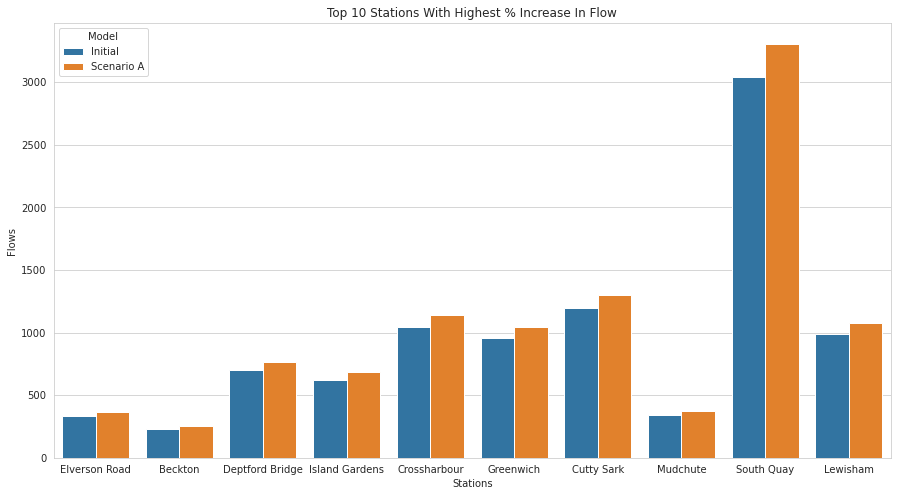

In [19]:
plt.figure(figsize=(15,8))
bar = pd.read_csv('plot_data/bar_a.csv')
sns.barplot(data=bar, x="station_destination", y="flow", hue="Model")
plt.title('Top 10 Stations With Highest % Increase In Flow')
plt.xlabel('Stations')
plt.ylabel('Flows')
plt.savefig("export/bar_a.png", bbox_inches='tight')

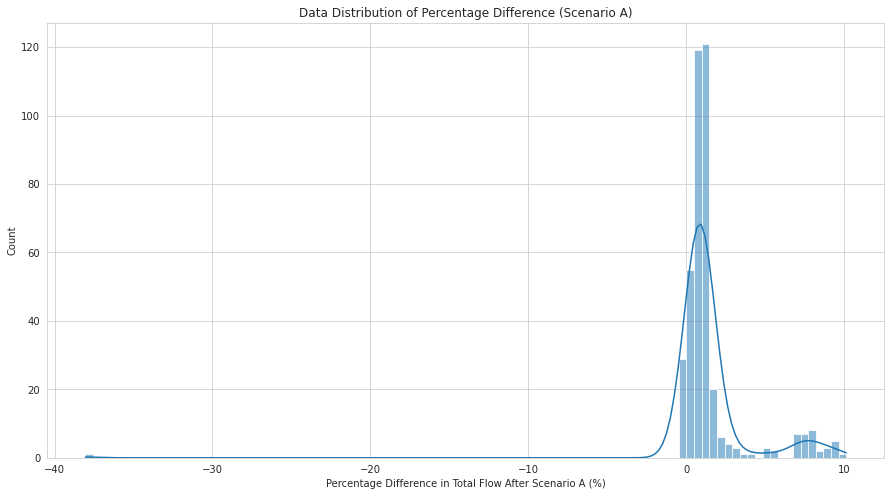

In [20]:
plt.figure(figsize=(15,8))
sns.histplot(p2['per_diff_a'], bins = 100, kde=True)
plt.title('Data Distribution of Percentage Difference (Scenario A)')
plt.xlabel('Percentage Difference in Total Flow After Scenario A (%)')
plt.savefig("export/dd_a.png", bbox_inches='tight')

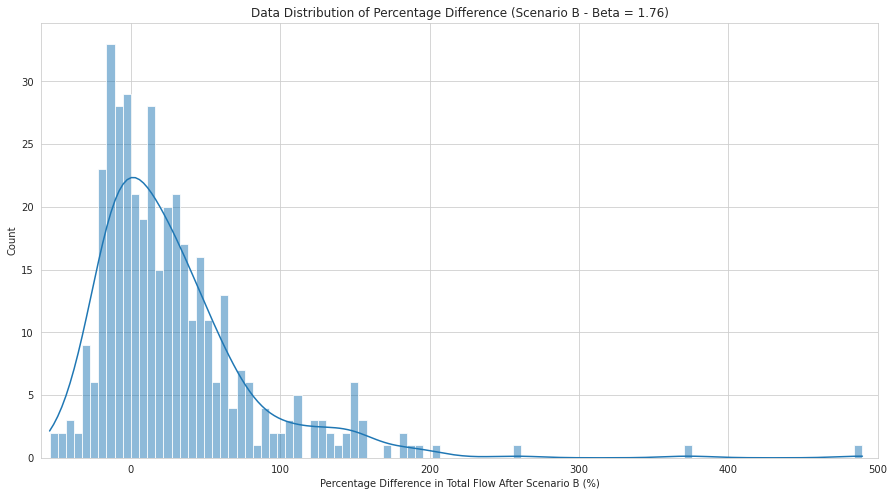

In [21]:
plt.figure(figsize=(15,8))
sns.histplot(p2['per_diff_b1'], bins = 100, kde=True)
plt.title('Data Distribution of Percentage Difference (Scenario B - Beta = 1.76)')
plt.xlabel('Percentage Difference in Total Flow After Scenario B (%)')
plt.xlim([-60, 500])
plt.savefig("export/dd_b1.png", bbox_inches='tight')

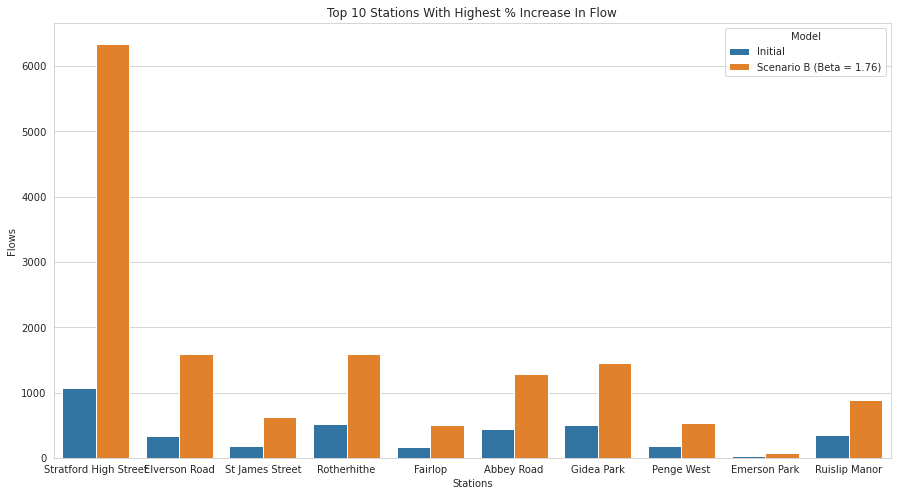

In [23]:
plt.figure(figsize=(15,8))
bar = pd.read_csv('plot_data/bar_b1.csv')
sns.barplot(data=bar, x="station_destination", y="flow", hue="Model")
plt.title('Top 10 Stations With Highest % Increase In Flow')
plt.xlabel('Stations')
plt.ylabel('Flows')
plt.savefig("export/bar_b1.png", bbox_inches='tight')

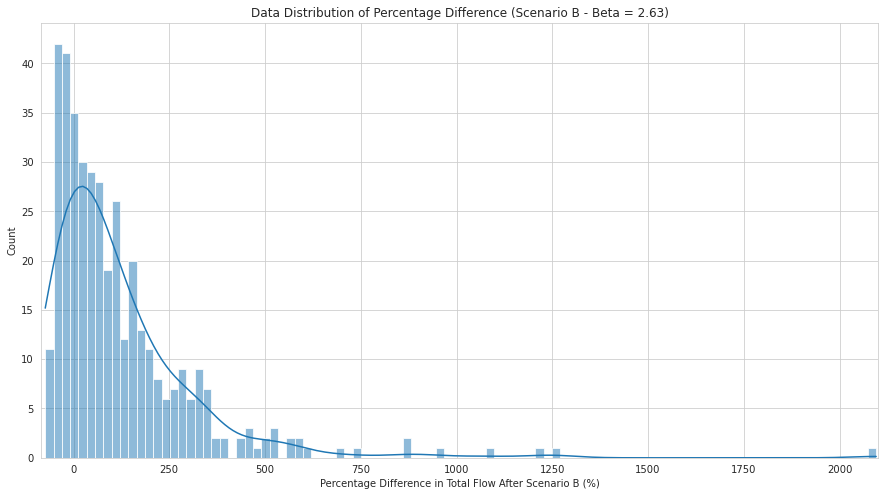

In [24]:
plt.figure(figsize=(15,8))
sns.histplot(p2['per_diff_b2'], bins = 100, kde=True)
plt.title('Data Distribution of Percentage Difference (Scenario B - Beta = 2.63)')
plt.xlabel('Percentage Difference in Total Flow After Scenario B (%)')
plt.xlim([-85, 2100])
plt.savefig("export/dd_b2.png", bbox_inches='tight')

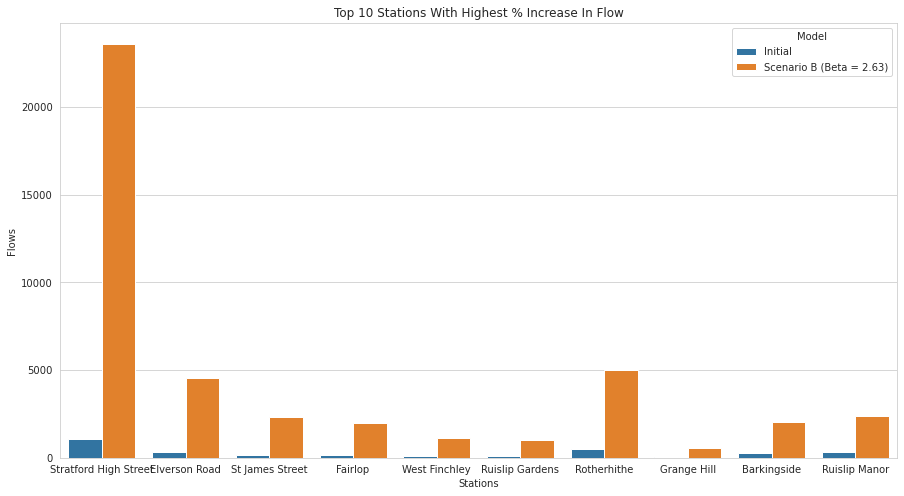

In [25]:
plt.figure(figsize=(15,8))
bar = pd.read_csv('plot_data/bar_b2.csv')
sns.barplot(data=bar, x="station_destination", y="flow", hue="Model")
plt.title('Top 10 Stations With Highest % Increase In Flow')
plt.xlabel('Stations')
plt.ylabel('Flows')
plt.savefig("export/bar_b2.png", bbox_inches='tight')

Text(0.5, 0, 'Percentage Difference in Total Flow After Scenario (%)')

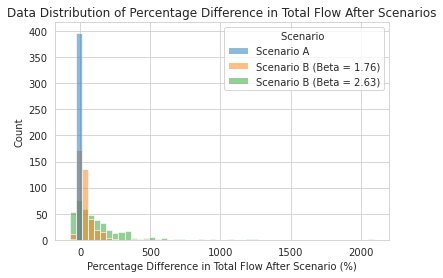

In [26]:
hist = pd.read_csv('plot_data/hist.csv')
sns.histplot(data=hist, x="cnt", hue="Scenario ", bins = 50)
plt.title('Data Distribution of Percentage Difference in Total Flow After Scenarios')
plt.xlabel('Percentage Difference in Total Flow After Scenario (%)')

In [27]:
p2_copy = p2[['per_diff_a', 'per_diff_b1', 'per_diff_b2']].copy()                                                 
p2_copy.rename(columns={'per_diff_a': 'Scenario A', 'per_diff_b1': 'Scenario B (Beta = 1.76)', 'per_diff_b2': 'Scenario B (Beta = 2.63)'}, inplace=True)

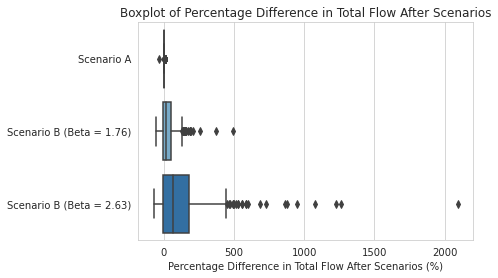

In [28]:
sns.set_style("whitegrid")
plt.title('Boxplot of Percentage Difference in Total Flow After Scenarios')
sns.boxplot(data=p2_copy, palette="Blues", orient="h")
plt.xlabel('Percentage Difference in Total Flow After Scenarios (%)')
plt.savefig("export/box.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

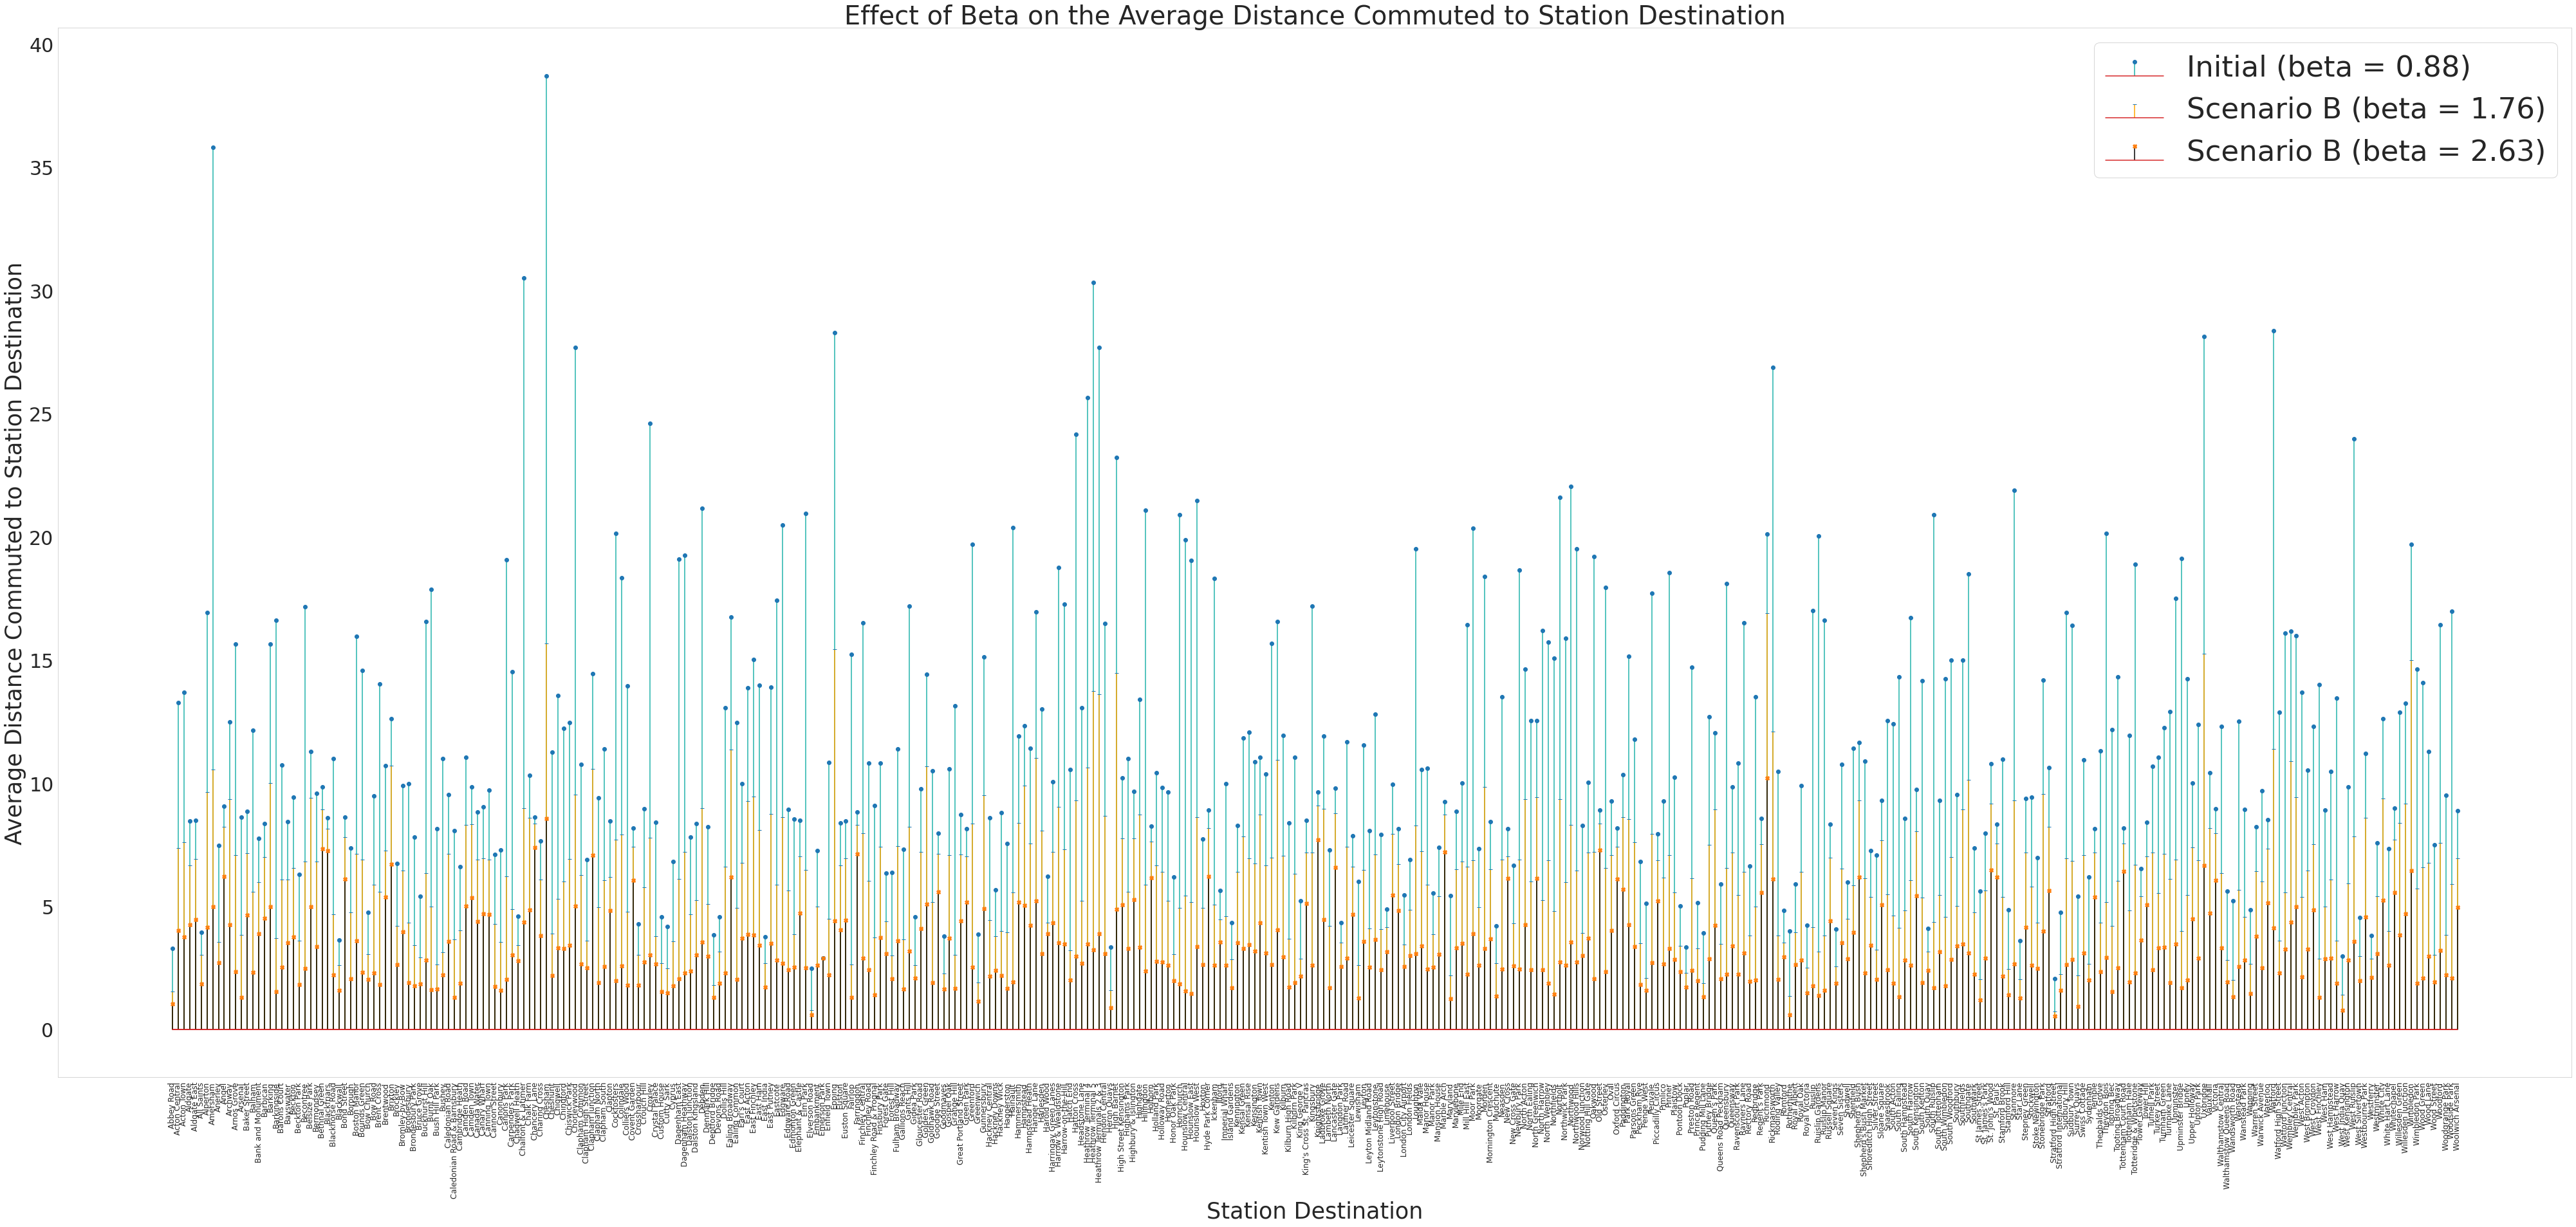

In [29]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig=plt.figure()
plt.figure(figsize=(70, 30))

avg = p2["avg_commute_dist"].values
dest = p2["station_destination"].values
avg_5 = p2["avg_commute_dist_5"].values
dest_5 = p2["station_destination"].values
avg_6 = p2["avg_commute_dist_6"].values
dest_6 = p2["station_destination"].values

# Giving title to the chart using plt.title
plt.title('Effect of Beta on the Average Distance Commuted to Station Destination', fontsize=40)
# Providing x, y and legend label to the chart
plt.ylabel('Average Distance Commuted to Station Destination', fontsize=35)
plt.xlabel('Station Destination', fontsize=35)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=30)

ax = plt.stem(dest, avg, linefmt='lightseagreen', label='Initial (beta = 0.88)'); plt.stem(dest_5, avg_5, linefmt='orange', markerfmt='_', label='Scenario B (beta = 1.76)'); plt.stem(dest_6, avg_6, linefmt='black', markerfmt='X', label='Scenario B (beta = 2.63)')

plt.legend(fontsize="45")
plt.show()

<Figure size 432x288 with 0 Axes>

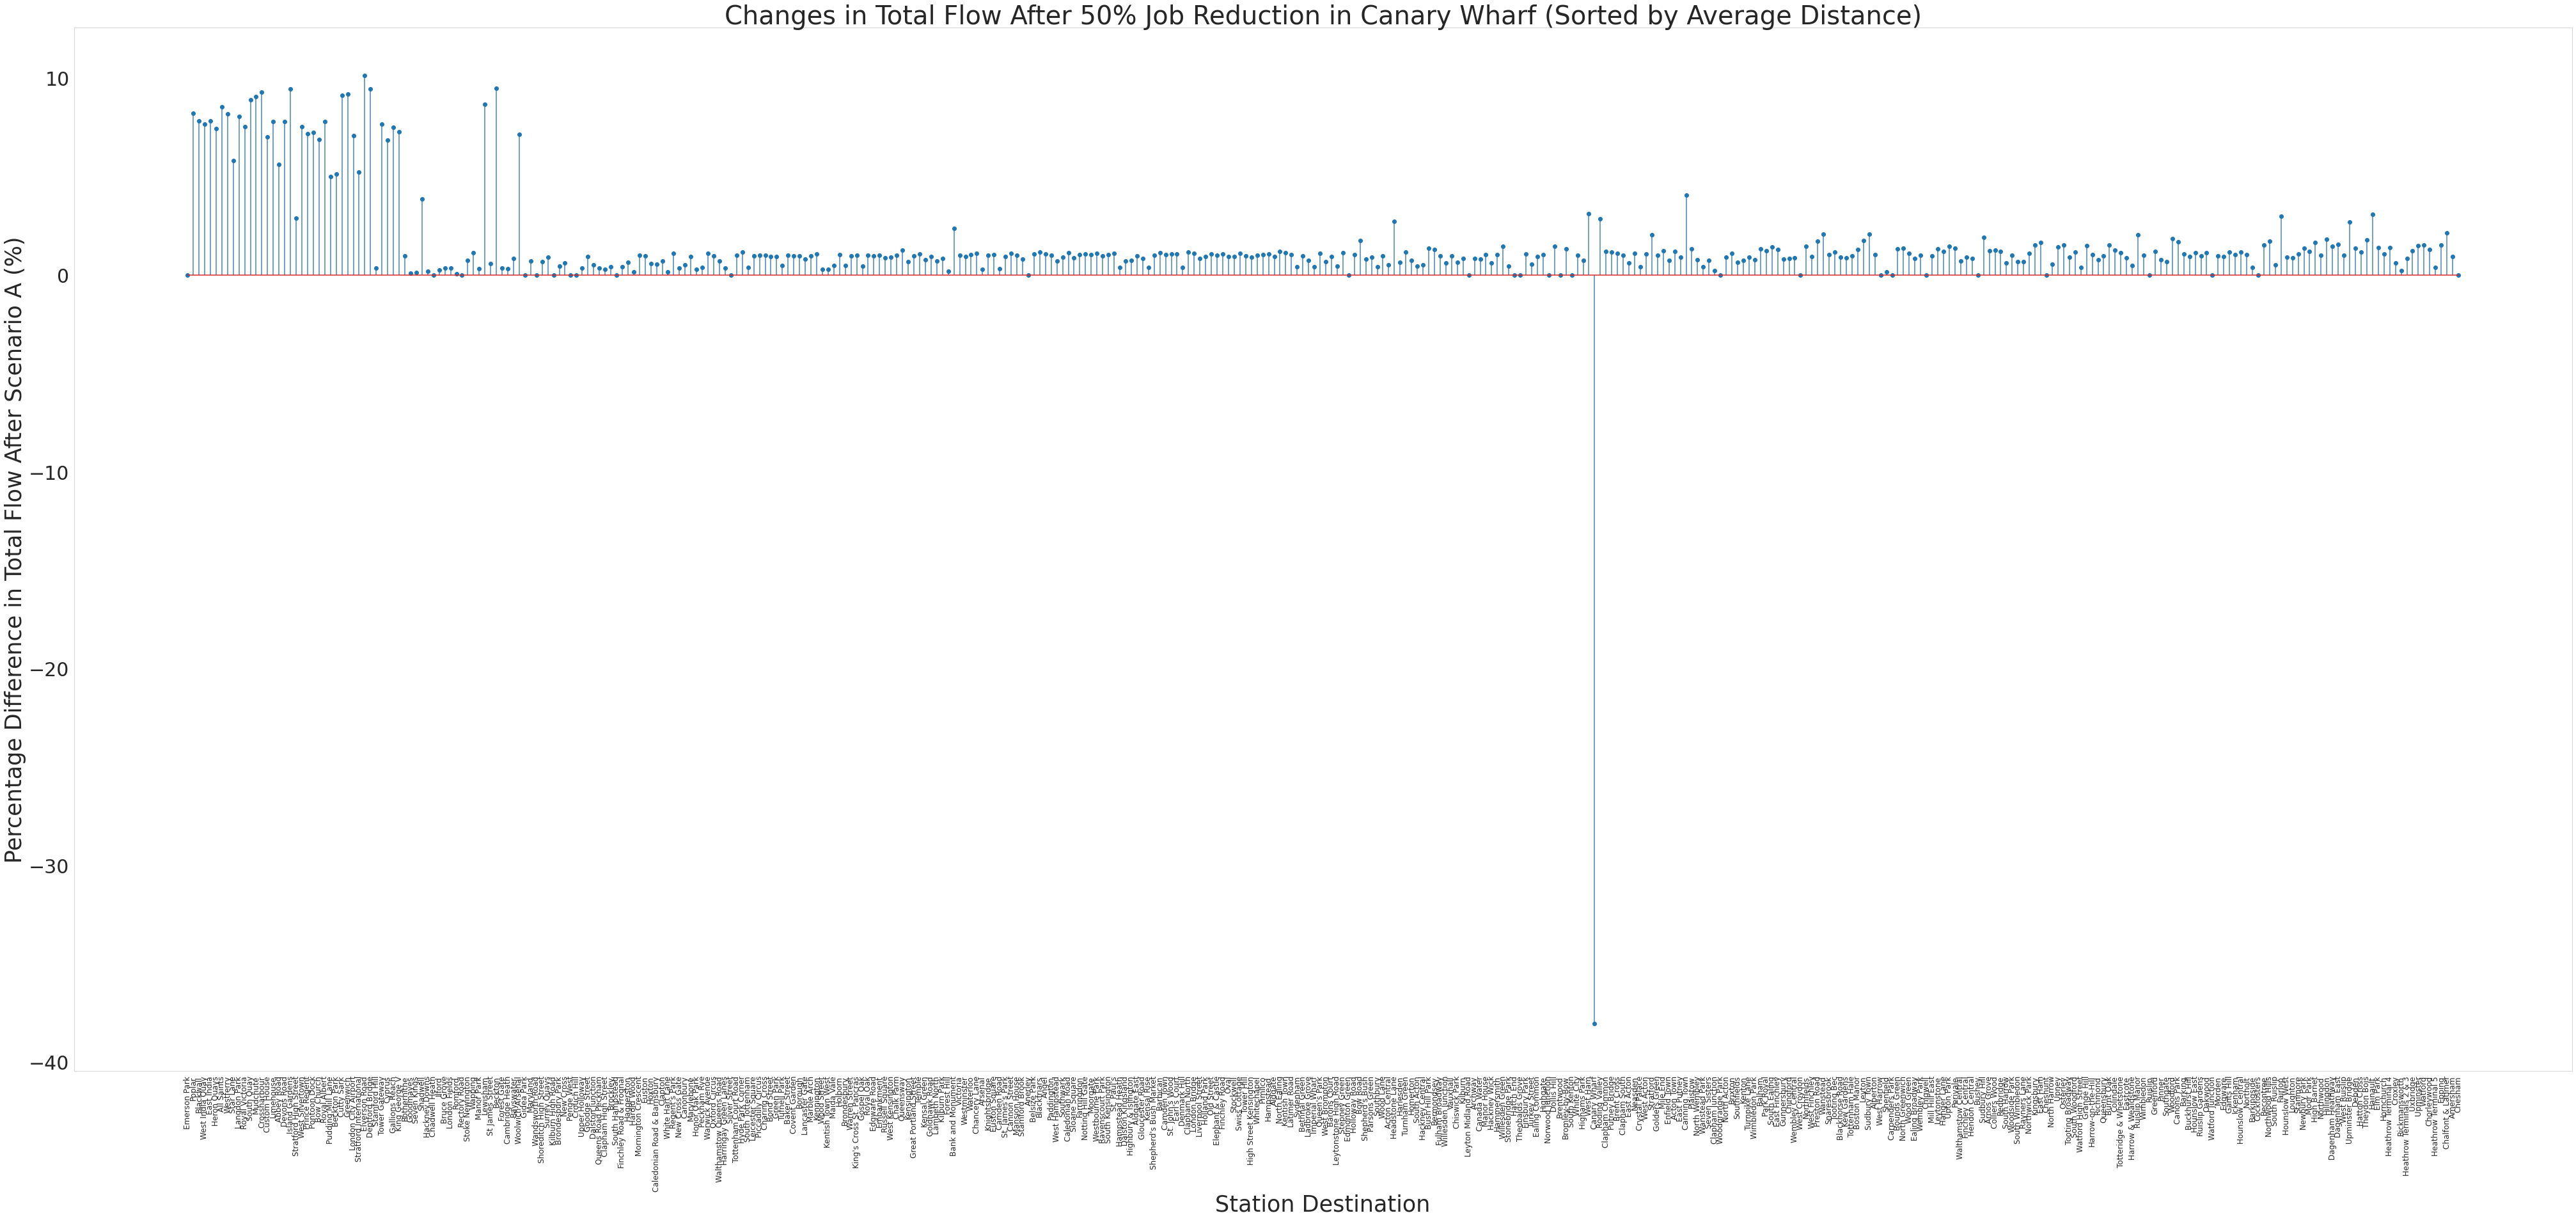

In [30]:
sns.set_style("whitegrid", {'axes.grid' : False})
p2_a = p2.sort_values(by=['distance'])

fig=plt.figure()
plt.figure(figsize=(70, 30))

per = p2_a["per_diff_a"].values
dest = p2_a["station_destination"].values

# Giving title to the chart using plt.title
plt.title('Changes in Total Flow After 50% Job Reduction in Canary Wharf (Sorted by Average Distance)', fontsize=40)
# Providing x, y and legend label to the chart
plt.ylabel('Percentage Difference in Total Flow After Scenario A (%)', fontsize=35)
plt.xlabel('Station Destination', fontsize=35)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=30)

ax = plt.stem(dest, per, linefmt='steelblue')

plt.show()
#plt.savefig('a_avgdist.png')

<Figure size 432x288 with 0 Axes>

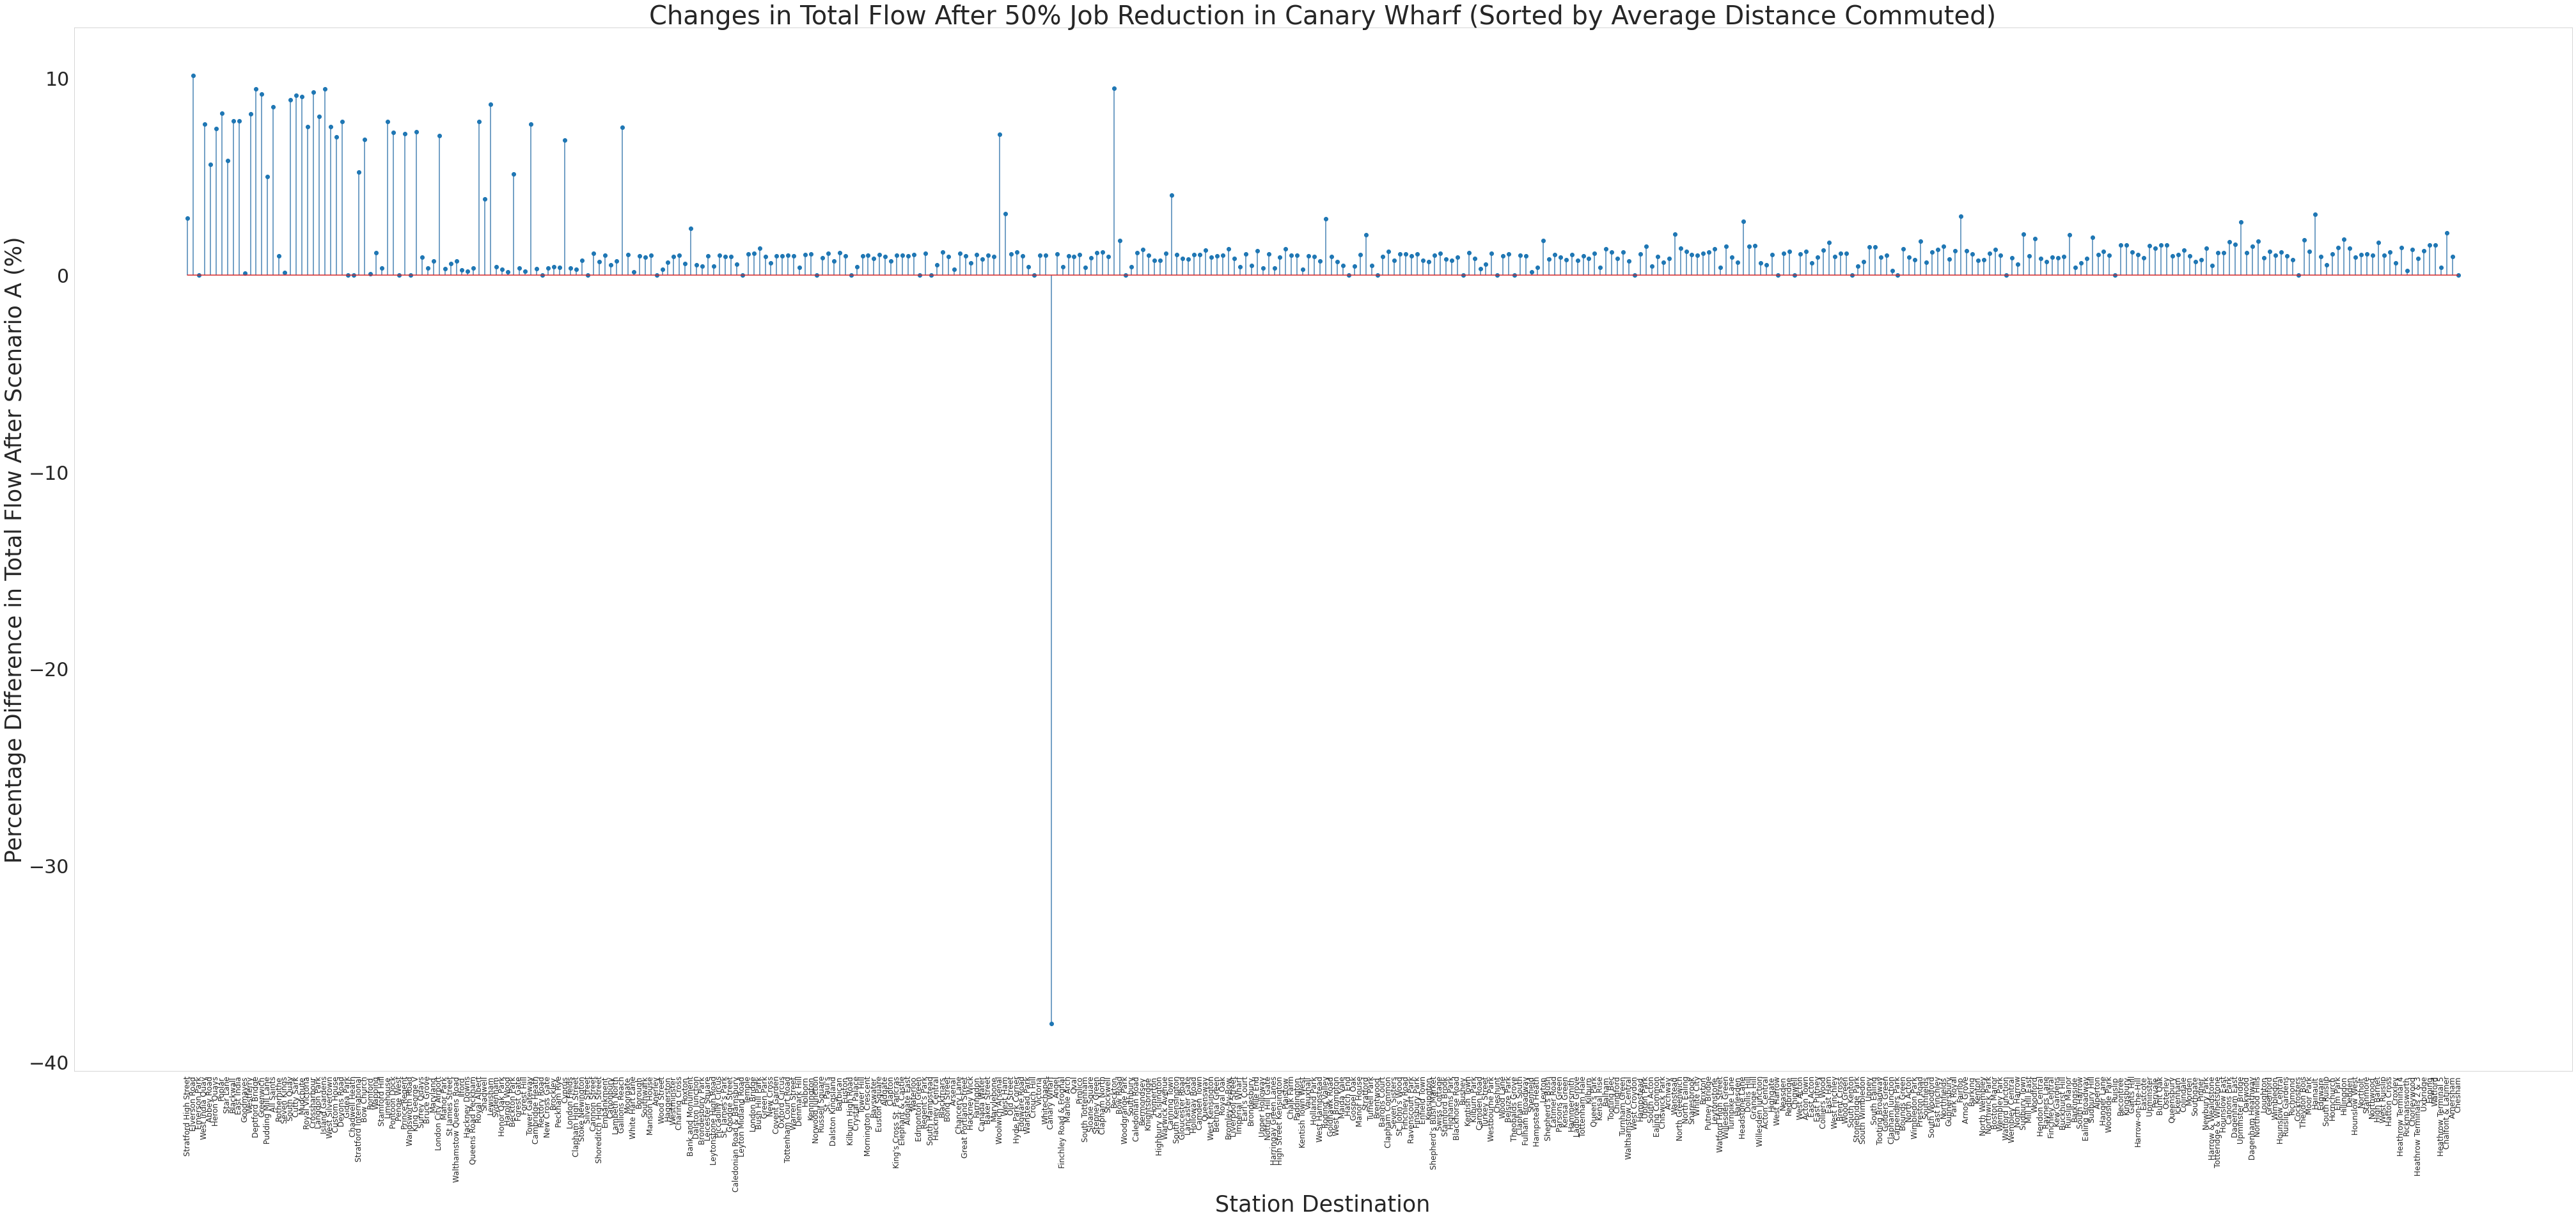

In [31]:
sns.set_style("whitegrid", {'axes.grid' : False})
p2_a = p2.sort_values(by=['avg_commute_dist'])

fig=plt.figure()
plt.figure(figsize=(70, 30))

per = p2_a["per_diff_a"].values
dest = p2_a["station_destination"].values

# Giving title to the chart using plt.title
plt.title('Changes in Total Flow After 50% Job Reduction in Canary Wharf (Sorted by Average Distance Commuted)', fontsize=40)
# Providing x, y and legend label to the chart
plt.ylabel('Percentage Difference in Total Flow After Scenario A (%)', fontsize=35)
plt.xlabel('Station Destination', fontsize=35)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=30)

ax = plt.stem(dest, per, linefmt='steelblue')

plt.show()

<Figure size 432x288 with 0 Axes>

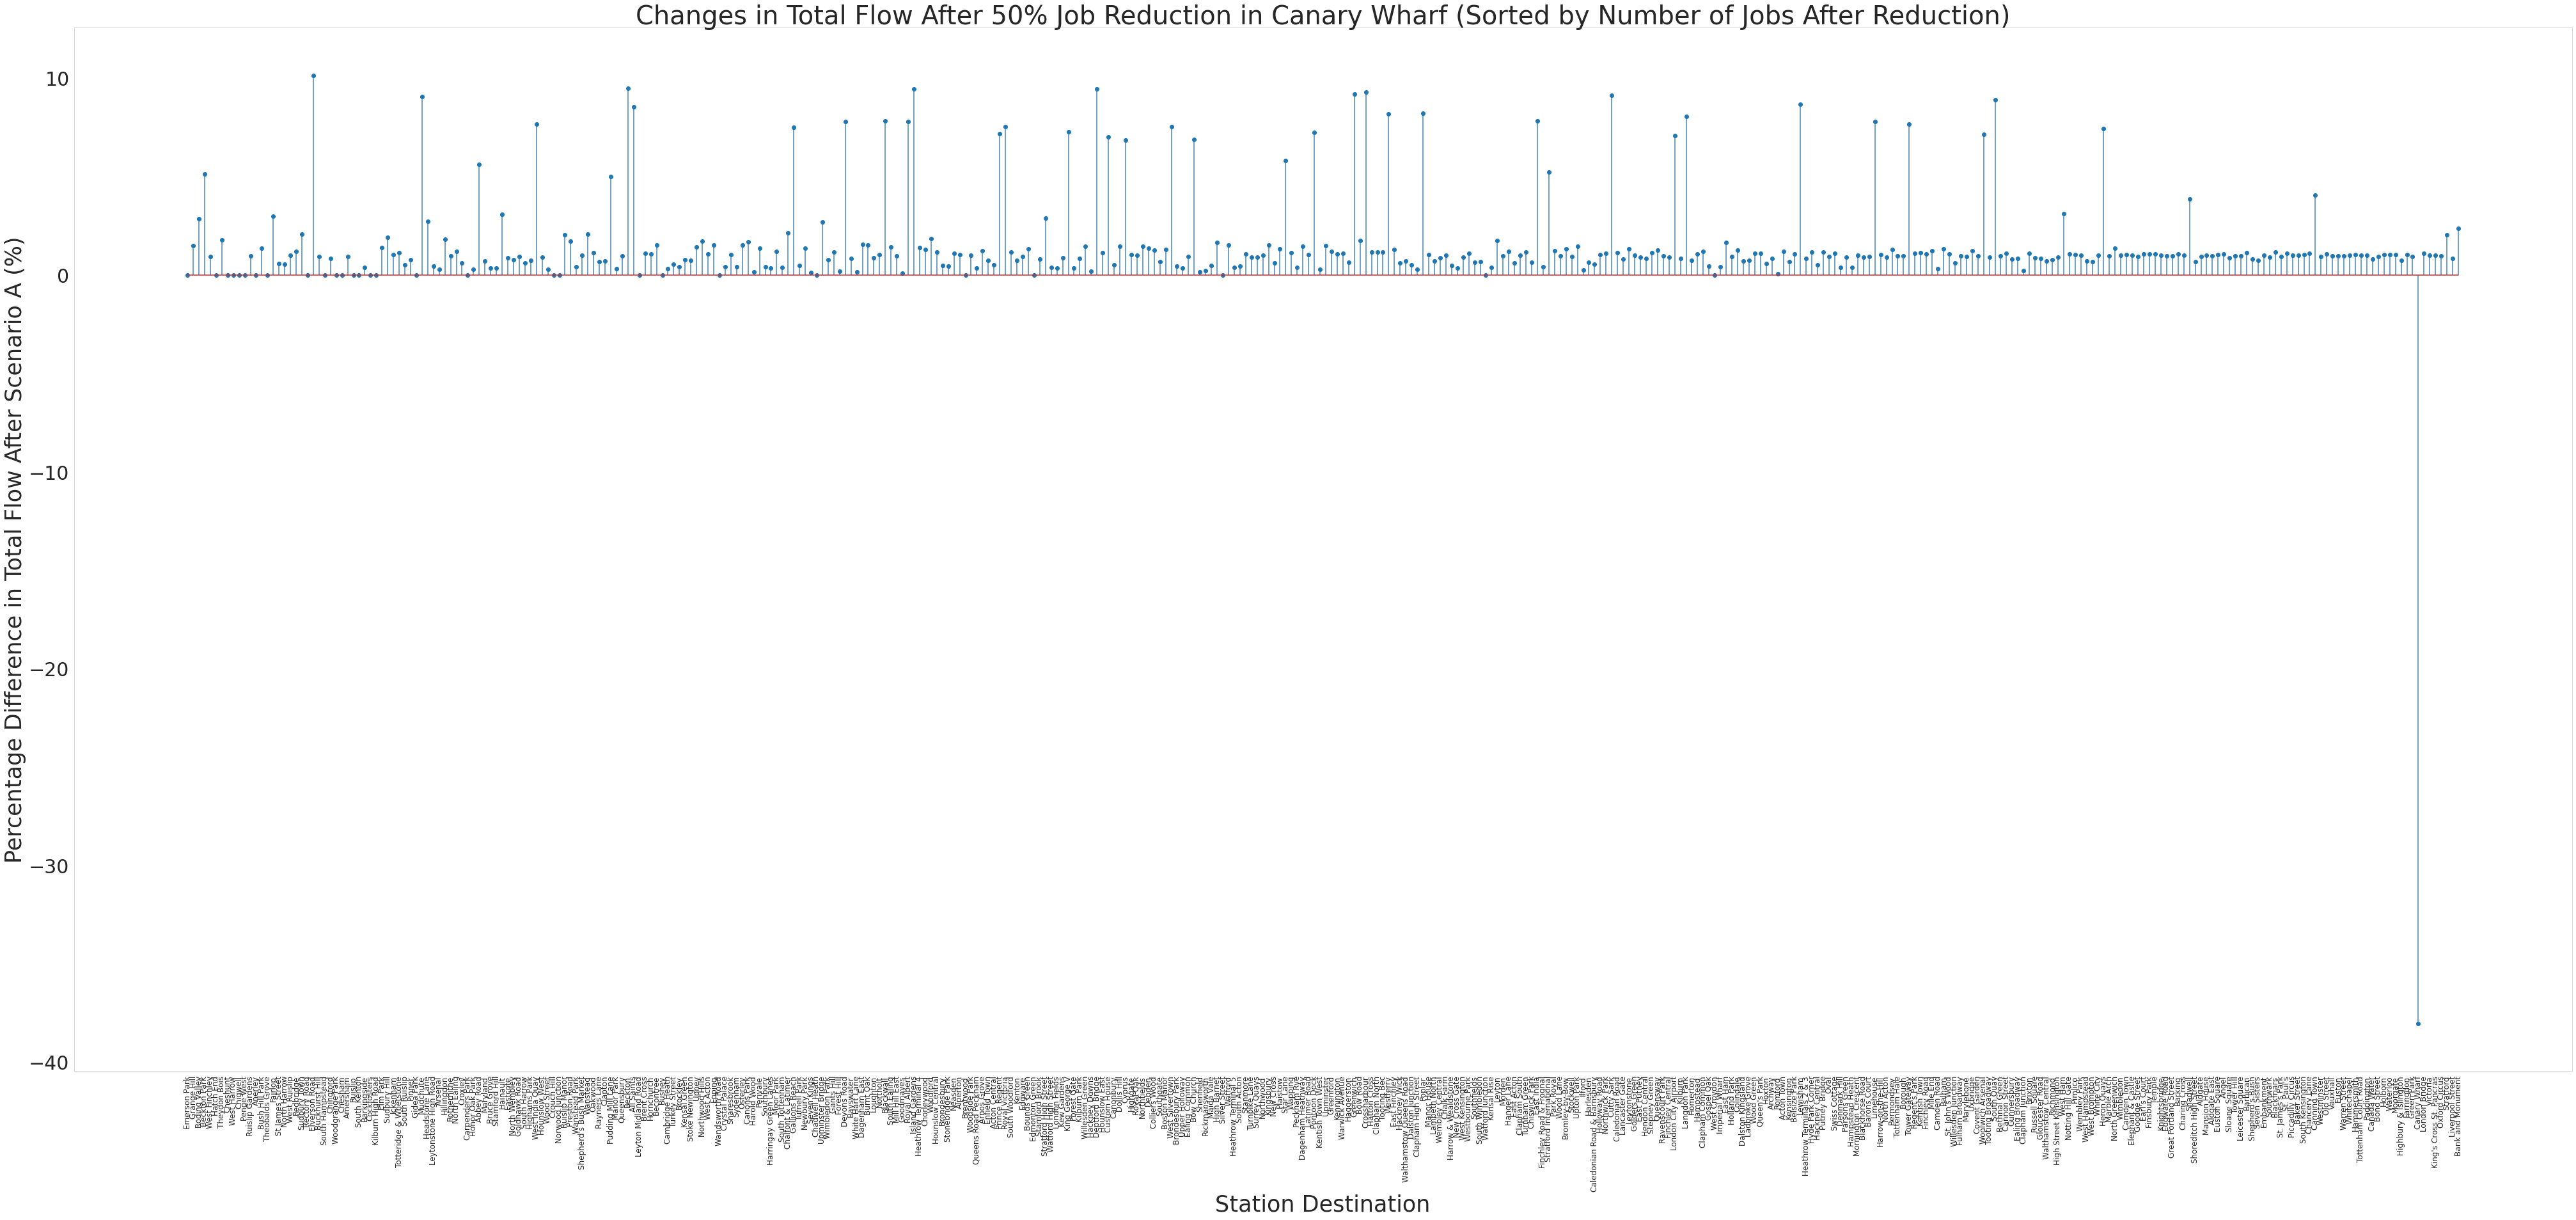

In [32]:
p2_a = p2.sort_values(by=['Dj1_jobsScenario'])

fig=plt.figure()
plt.figure(figsize=(70, 30))

per = p2_a["per_diff_a"].values
dest = p2_a["station_destination"].values

# Giving title to the chart using plt.title
plt.title('Changes in Total Flow After 50% Job Reduction in Canary Wharf (Sorted by Number of Jobs After Reduction)', fontsize=40)
# Providing x, y and legend label to the chart
plt.ylabel('Percentage Difference in Total Flow After Scenario A (%)', fontsize=35)
plt.xlabel('Station Destination', fontsize=35)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=30)

ax = plt.stem(dest, per, linefmt='steelblue')

plt.show()
#plt.savefig('a_jobs.png')

<Figure size 432x288 with 0 Axes>

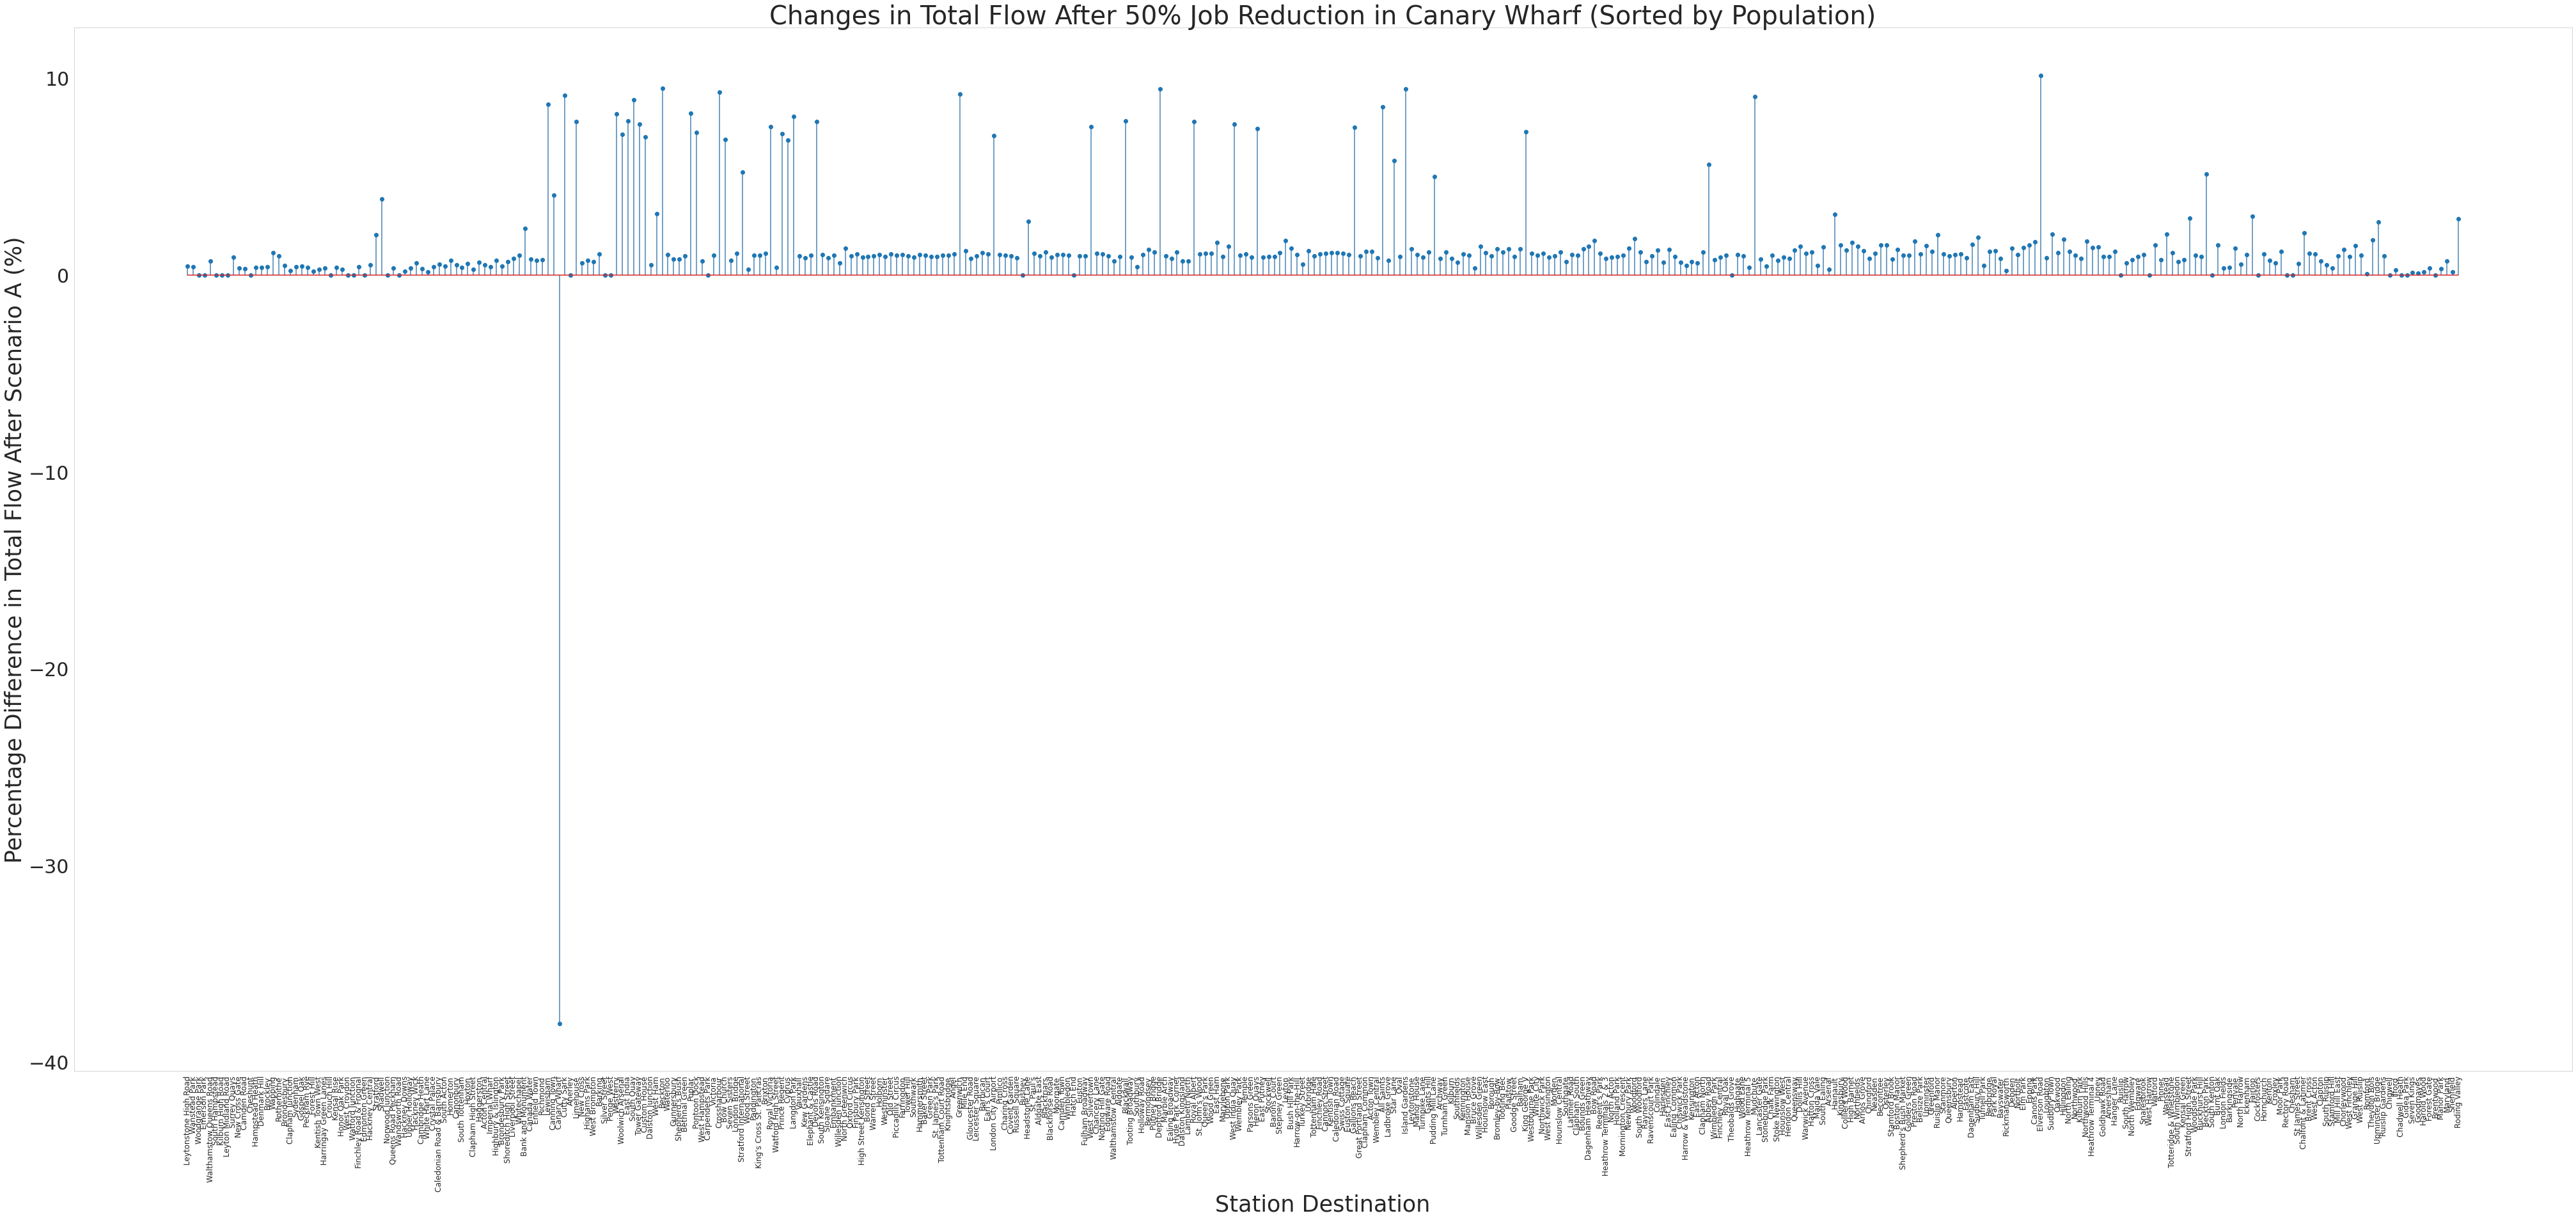

In [33]:
p2_a = p2.sort_values(by=['population'])

fig=plt.figure()
plt.figure(figsize=(70, 30))

per = p2_a["per_diff_a"].values
dest = p2_a["station_destination"].values

# Giving title to the chart using plt.title
plt.title('Changes in Total Flow After 50% Job Reduction in Canary Wharf (Sorted by Population)', fontsize=40)
# Providing x, y and legend label to the chart
plt.ylabel('Percentage Difference in Total Flow After Scenario A (%)', fontsize=35)
plt.xlabel('Station Destination', fontsize=35)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=30)

ax = plt.stem(dest, per, linefmt='steelblue')

plt.show()
#plt.savefig('a_pop.png')

<Figure size 432x288 with 0 Axes>

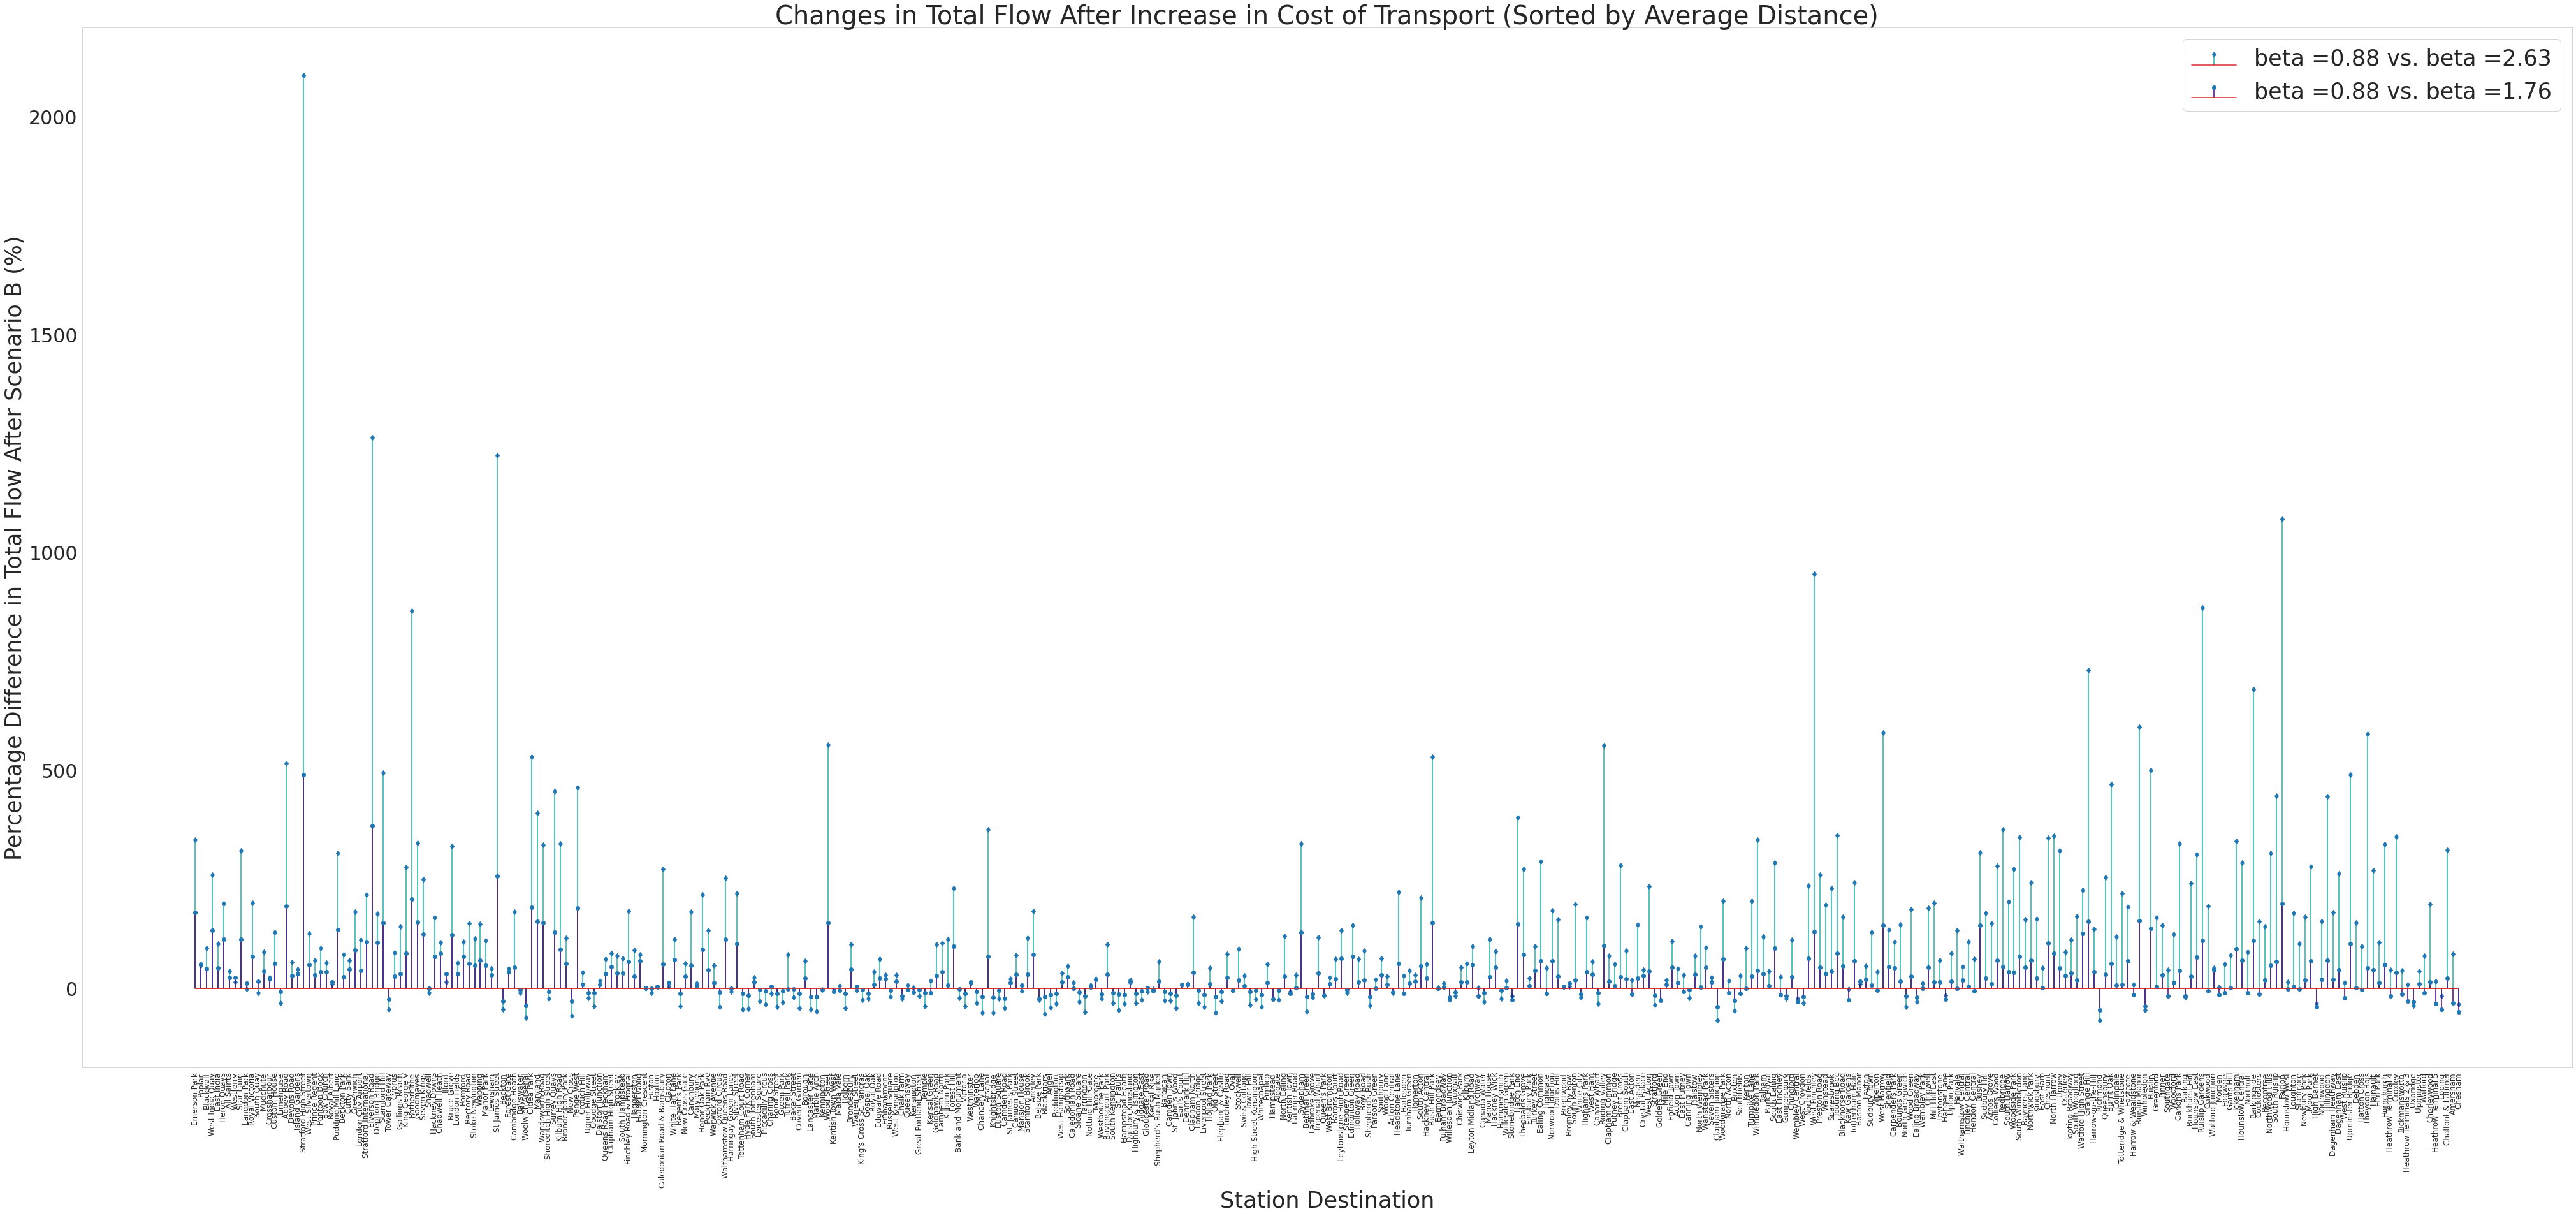

In [34]:
p2_b = p2.sort_values(by=['distance'])

fig=plt.figure()
plt.figure(figsize=(70, 30))

per_b1 = p2_b["per_diff_b1"].values
per_b2 = p2_b["per_diff_b2"].values
dest = p2_b["station_destination"].values

# Giving title to the chart using plt.title
plt.title('Changes in Total Flow After Increase in Cost of Transport (Sorted by Average Distance)', fontsize=40)
# Providing x, y and legend label to the chart
plt.ylabel('Percentage Difference in Total Flow After Scenario B (%)', fontsize=35)
plt.xlabel('Station Destination', fontsize=35)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=30)

ax = plt.stem(dest, per_b2, linefmt='lightseagreen', markerfmt='d', label='beta =0.88 vs. beta =2.63'); plt.stem(dest, per_b1, linefmt='indigo', label='beta =0.88 vs. beta =1.76')

plt.legend(fontsize="35")
plt.show()

<Figure size 432x288 with 0 Axes>

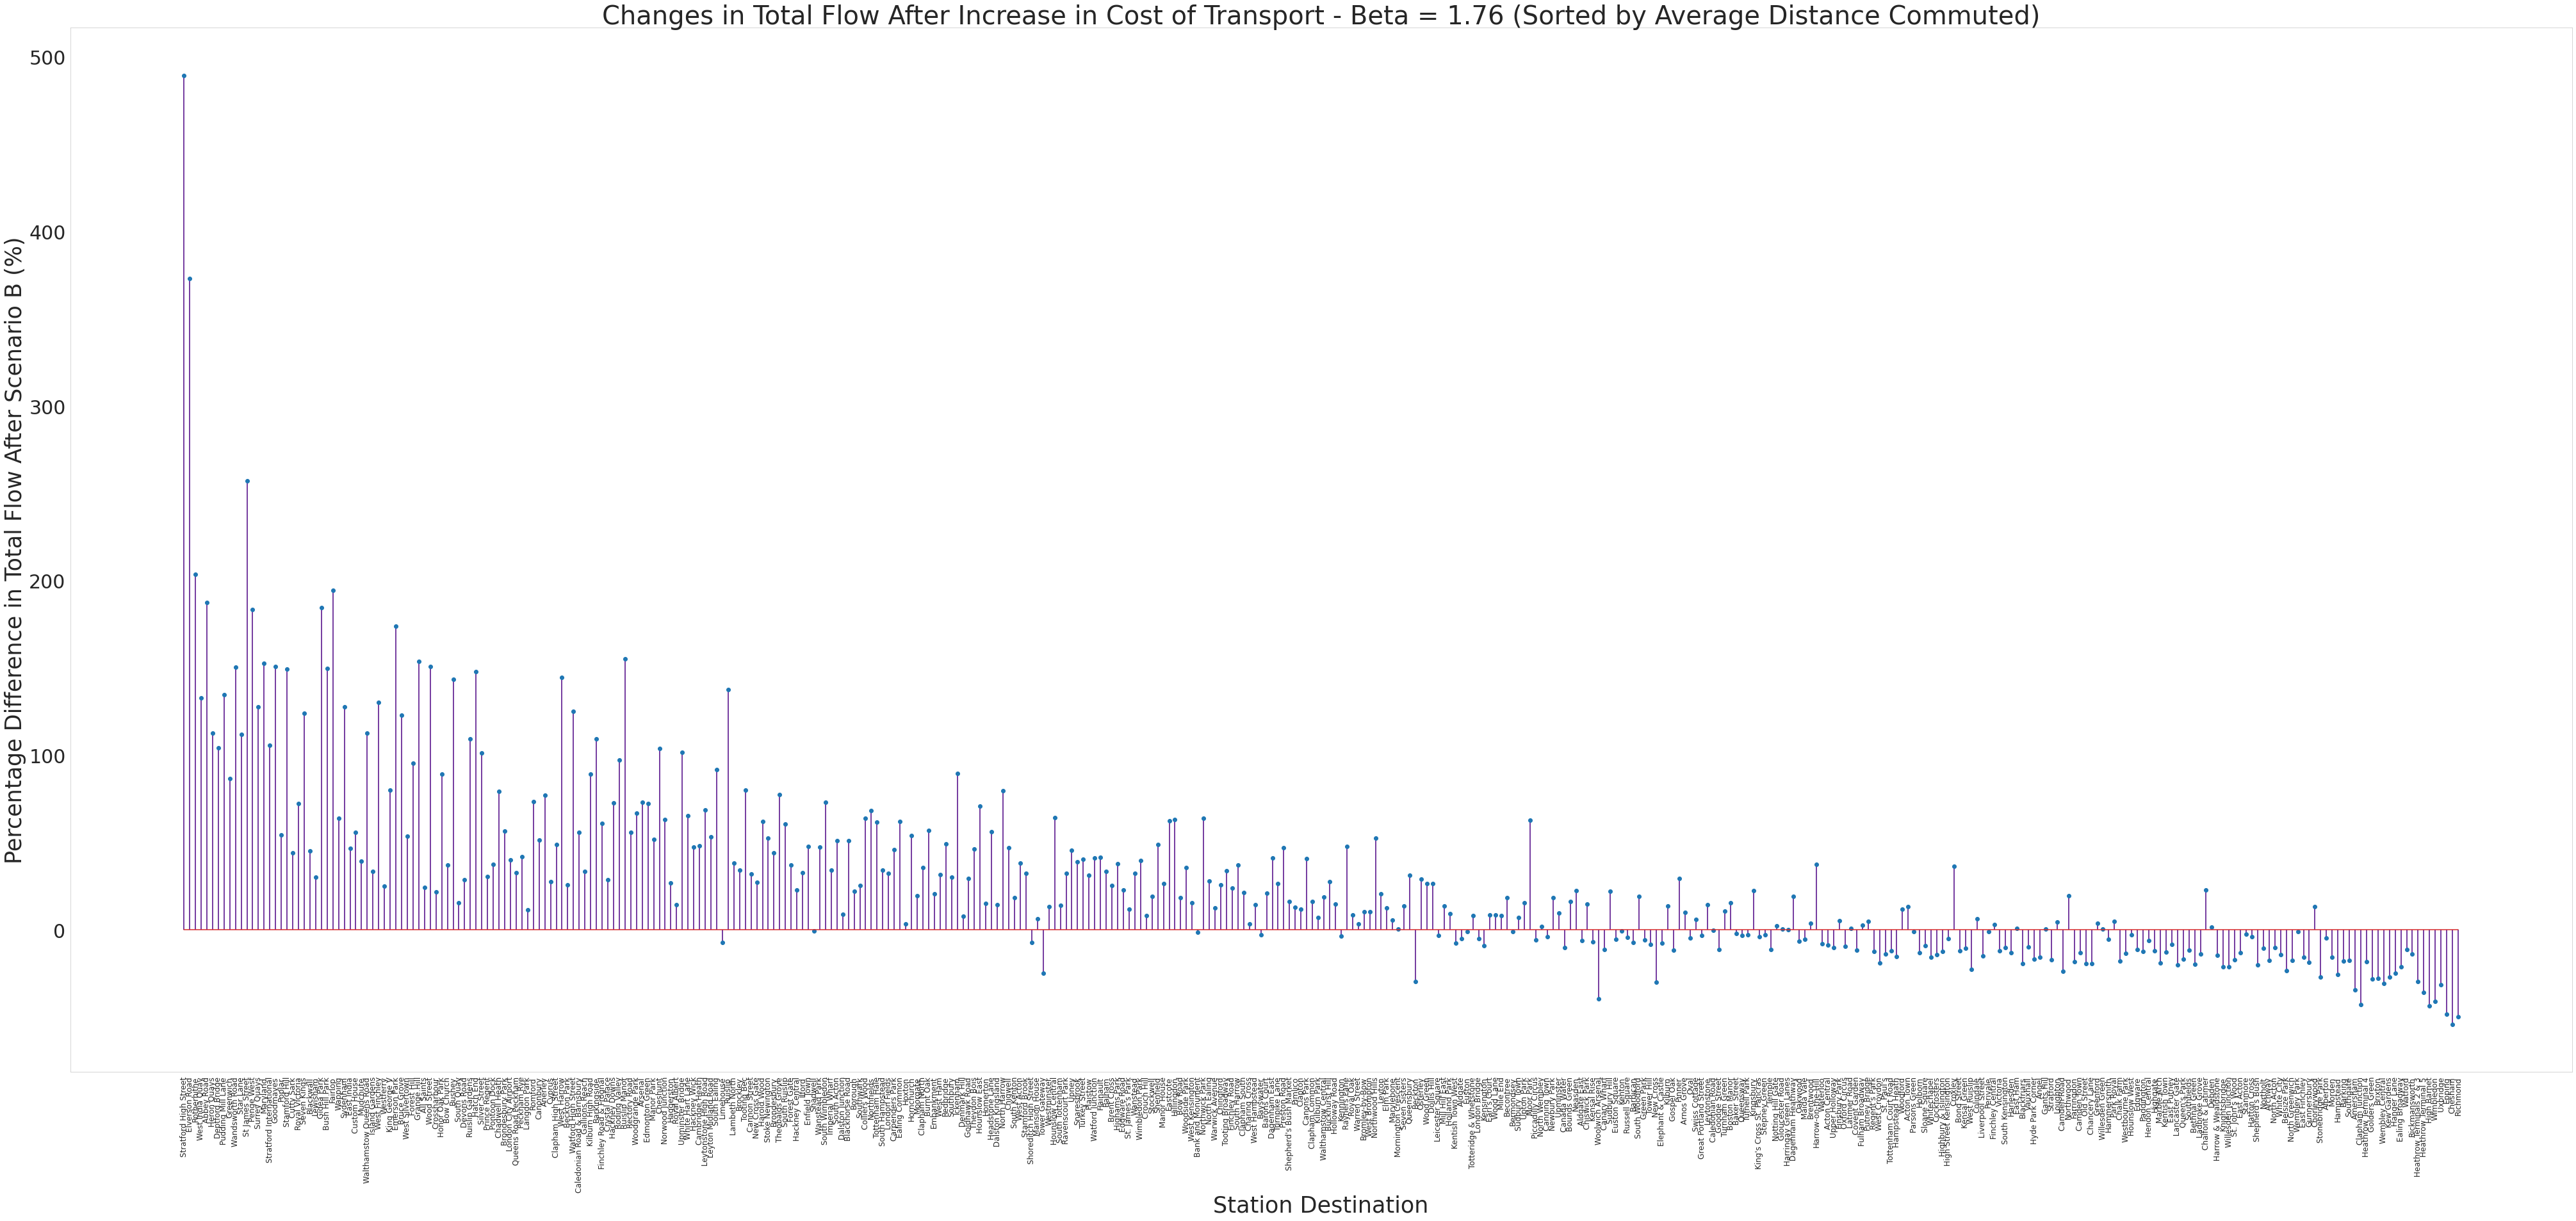

In [35]:
sns.set_style("whitegrid", {'axes.grid' : False})
p2_b = p2.sort_values(by=['avg_commute_dist_5'])

fig=plt.figure()
plt.figure(figsize=(70, 30))

per_b1 = p2_b["per_diff_b1"].values
dest = p2_b["station_destination"].values

# Giving title to the chart using plt.title
plt.title('Changes in Total Flow After Increase in Cost of Transport - Beta = 1.76 (Sorted by Average Distance Commuted)', fontsize=40)
# Providing x, y and legend label to the chart
plt.ylabel('Percentage Difference in Total Flow After Scenario B (%)', fontsize=35)
plt.xlabel('Station Destination', fontsize=35)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=30)

ax = plt.stem(dest, per_b1, linefmt='indigo')

plt.show()

<Figure size 432x288 with 0 Axes>

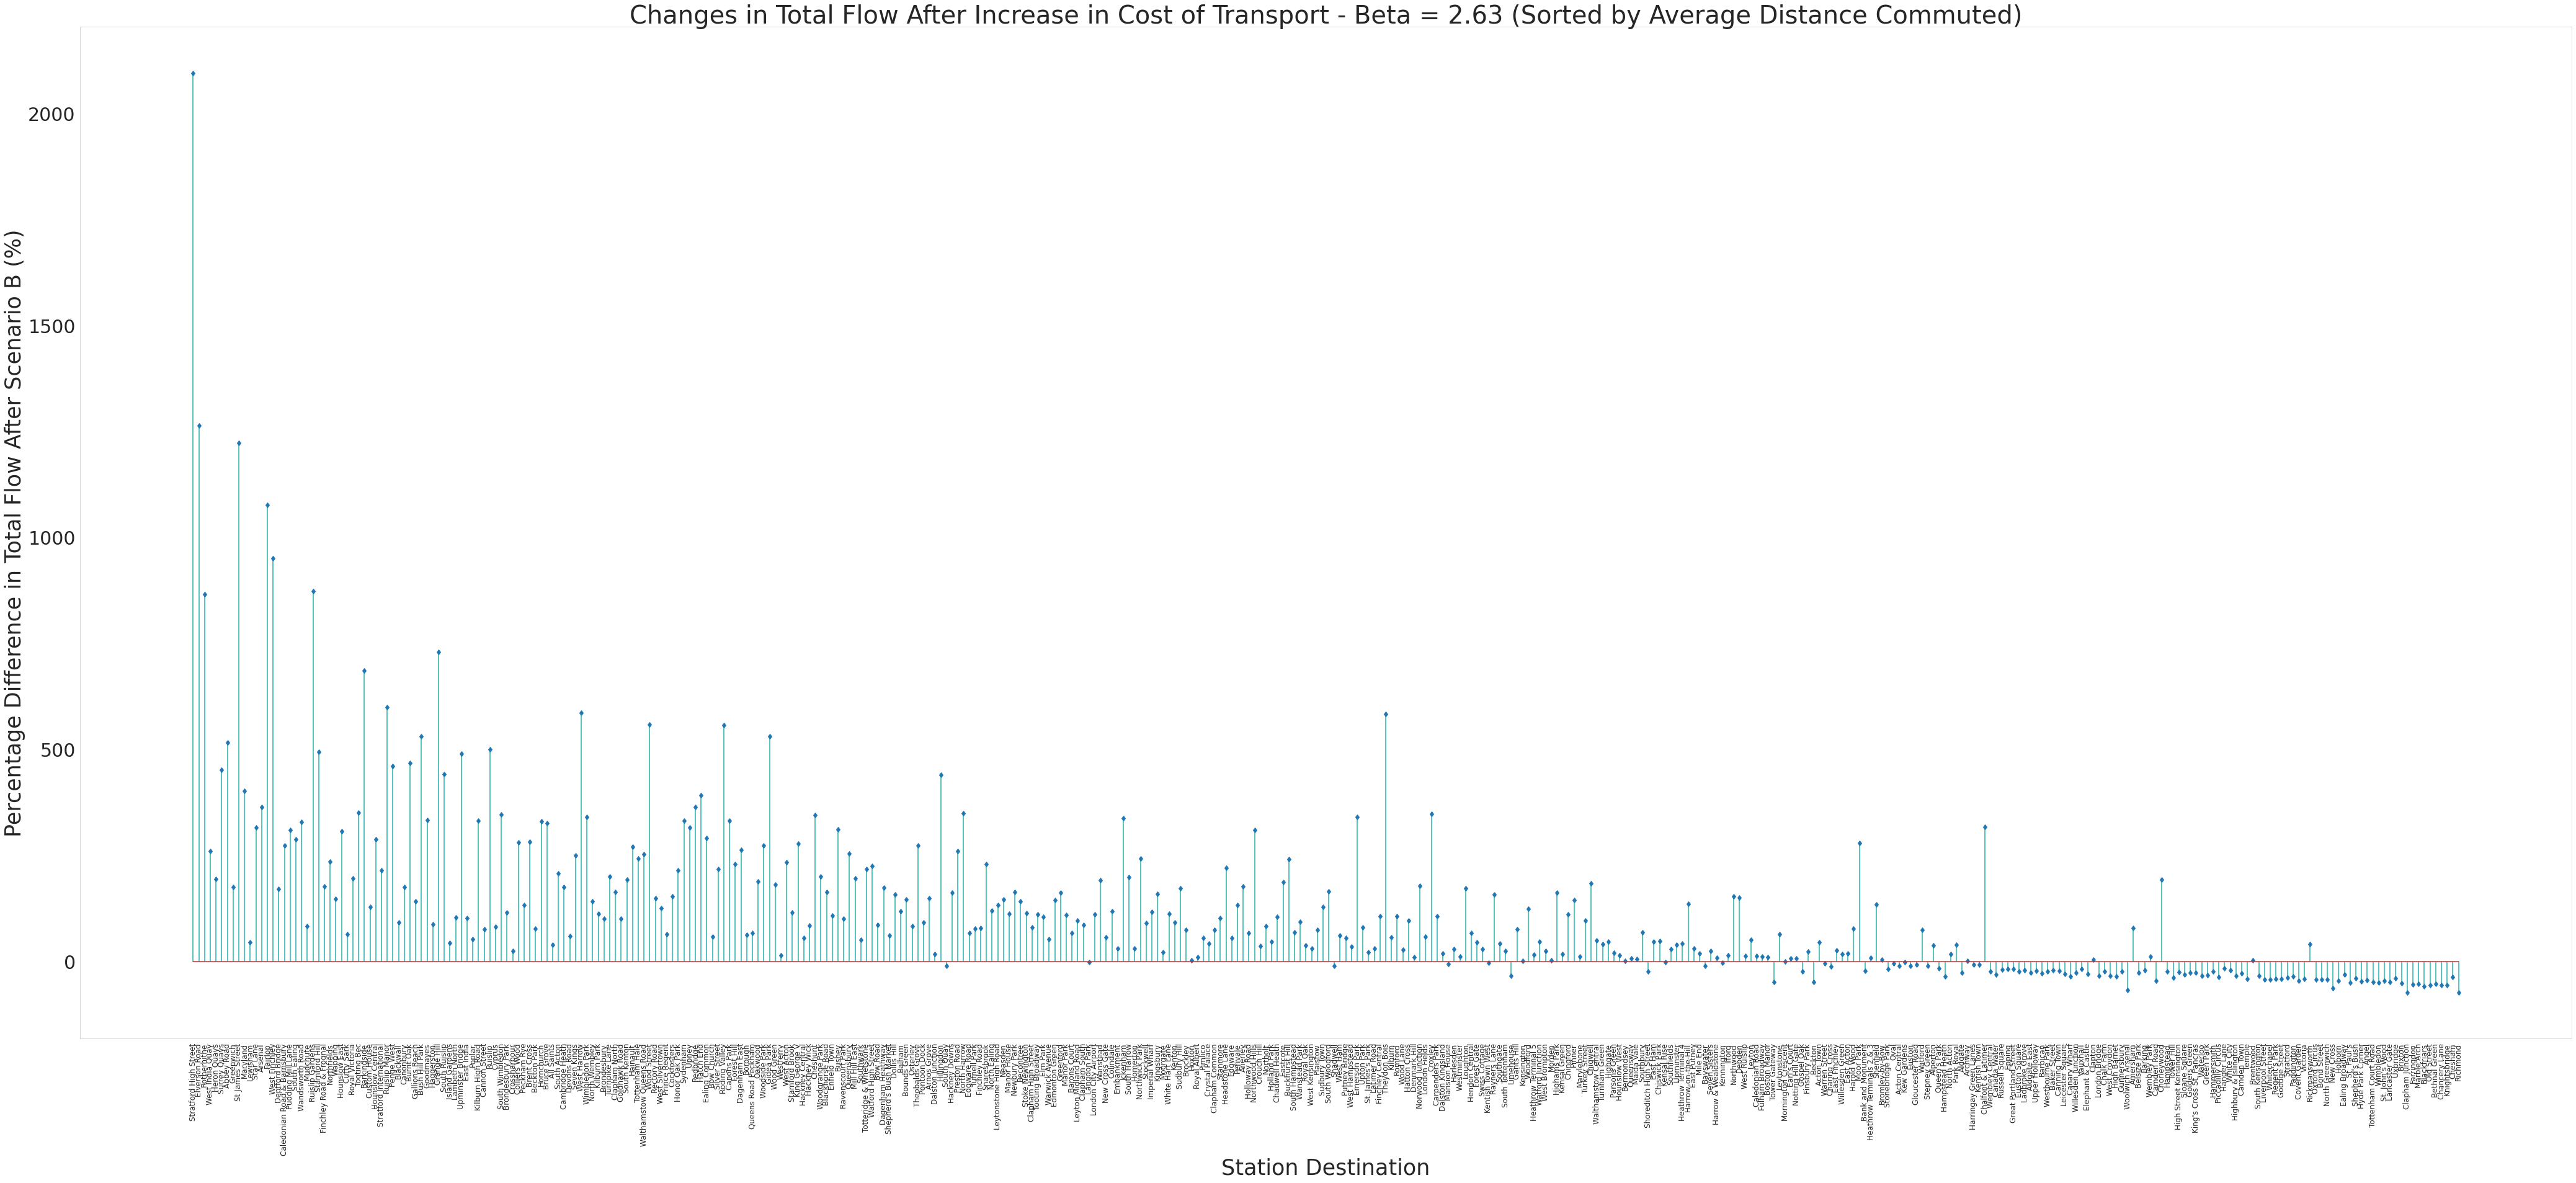

In [36]:
sns.set_style("whitegrid", {'axes.grid' : False})
p2_b = p2.sort_values(by=['avg_commute_dist_6'])

fig=plt.figure()
plt.figure(figsize=(72, 30))

per_b2 = p2_b["per_diff_b2"].values
dest = p2_b["station_destination"].values

# Giving title to the chart using plt.title
plt.title('Changes in Total Flow After Increase in Cost of Transport - Beta = 2.63 (Sorted by Average Distance Commuted)', fontsize=40)
# Providing x, y and legend label to the chart
plt.ylabel('Percentage Difference in Total Flow After Scenario B (%)', fontsize=35)
plt.xlabel('Station Destination', fontsize=35)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=30)

ax = plt.stem(dest, per_b2, linefmt='lightseagreen', markerfmt='d')

plt.show()